<h4><center>Parity Risk Strategies on a variety of Portfolio (Bonds, Equities, Commodities, and Currencies)</center></h4>

<h5><center>Dataset cover time frame from Jan 2009 till Dec 2015</center></h5>

In [1]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import datetime
from matplotlib import rcParams
from datetime import datetime

In [2]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df_2009_2015 = pd.read_csv('Bond_2009_2015.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df_2009_2015.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df_2009_2015.head()

(84, 7)


,Date,Germany,Australia,US,UK,Canada,Japan
0,1/1/2009,103.77,109.41,107.63,109.98,109.55,100.09
1,2/1/2009,105.34,106.81,97.69,107.53,105.37,100.31
2,3/1/2009,106.29,110.24,100.70,111.31,108.53,99.52
3,4/1/2009,104.78,97.84,96.91,108.27,105.64,98.88
4,5/1/2009,99.32,92.01,97.19,106.20,102.77,100.04


In [3]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df_2009_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       84 non-null     object 
 1   Germany    84 non-null     float64
 2   Australia  84 non-null     float64
 3   US         84 non-null     float64
 4   UK         84 non-null     float64
 5   Canada     84 non-null     float64
 6   Japan      84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB


In [4]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df_2009_2015['Date'] = pd.to_datetime(bond_df_2009_2015.Date)

In [5]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df_2009_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       84 non-null     datetime64[ns]
 1   Germany    84 non-null     float64       
 2   Australia  84 non-null     float64       
 3   US         84 non-null     float64       
 4   UK         84 non-null     float64       
 5   Canada     84 non-null     float64       
 6   Japan      84 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 4.7 KB


In [6]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df_2009_2015.set_index('Date',inplace=True)

In [7]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
bond_df_2009_2015.isnull().any()

Germany      False
Australia    False
US           False
UK           False
Canada       False
Japan        False
dtype: bool

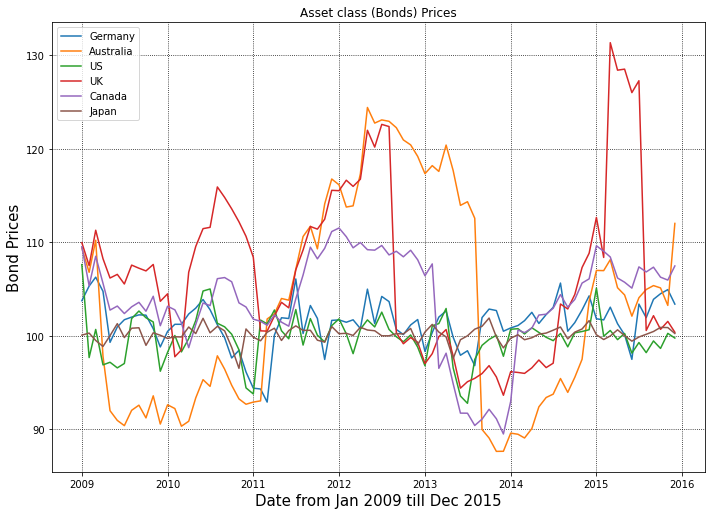

In [8]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df_2009_2015.index, bond_df_2009_2015.Germany, label='Germany')
plt.plot(bond_df_2009_2015.index, bond_df_2009_2015.Australia, label='Australia')
plt.plot(bond_df_2009_2015.index, bond_df_2009_2015.US, label='US')
plt.plot(bond_df_2009_2015.index, bond_df_2009_2015.UK, label='UK')
plt.plot(bond_df_2009_2015.index, bond_df_2009_2015.Canada, label='Canada')
plt.plot(bond_df_2009_2015.index, bond_df_2009_2015.Japan, label='Japan')

plt.title('Asset class (Bonds) Prices')
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=15)
plt.ylabel('Bond Prices', fontsize=15)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [9]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df_2009_2015 = bond_df_2009_2015[['Germany','Australia','US','UK','Canada','Japan']].pct_change()
bond_df_2009_2015.head(5)

,Germany,Australia,US,UK,Canada,Japan
Date,,,,,,
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2009-02-01,0.015130,-0.023764,-0.092353,-0.022277,-0.038156,0.002198
2009-03-01,0.009018,0.032113,0.030812,0.035153,0.029990,-0.007876
2009-04-01,-0.014206,-0.112482,-0.037637,-0.027311,-0.026629,-0.006431
2009-05-01,-0.052109,-0.059587,0.002889,-0.019119,-0.027168,0.011731


In [10]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df_2009_2015.dropna(axis=0, inplace=True)
bond_df_2009_2015.head(5)

,Germany,Australia,US,UK,Canada,Japan
Date,,,,,,
2009-02-01,0.015130,-0.023764,-0.092353,-0.022277,-0.038156,0.002198
2009-03-01,0.009018,0.032113,0.030812,0.035153,0.029990,-0.007876
2009-04-01,-0.014206,-0.112482,-0.037637,-0.027311,-0.026629,-0.006431
2009-05-01,-0.052109,-0.059587,0.002889,-0.019119,-0.027168,0.011731
2009-06-01,0.016613,-0.011303,-0.006173,0.003672,0.004184,0.012795


In [11]:
print('There are {} rows in the DataFrame'.format(bond_df_2009_2015.shape[0]))

There are 83 rows in the DataFrame


In [12]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
bond_df_2009_2015_2 = bond_df_2009_2015.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [13]:
vol_bond_df_2009_2015 = bond_df_2009_2015

In [14]:
vol_bond_df_2009_2015.shape[0]

83

In [15]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_bond_df_2009_2015['Germany_Vol'] = vol_bond_df_2009_2015['Germany'].rolling(83).std() * math.sqrt(83)
vol_bond_df_2009_2015['Australia_Vol'] = vol_bond_df_2009_2015['Australia'].rolling(83).std() * math.sqrt(83)
vol_bond_df_2009_2015['US_Vol'] = vol_bond_df_2009_2015['US'].rolling(83).std() * math.sqrt(83)
vol_bond_df_2009_2015['UK_Vol'] = vol_bond_df_2009_2015['UK'].rolling(83).std() * math.sqrt(83)
vol_bond_df_2009_2015['Canada_Vol'] = vol_bond_df_2009_2015['Canada'].rolling(83).std() * math.sqrt(83)
vol_bond_df_2009_2015['Japan_Vol'] = vol_bond_df_2009_2015['Japan'].rolling(83).std() * math.sqrt(83)

In [16]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_bond_df_2009_2015.dropna(axis=0, inplace=True)

In [17]:
vol_bond_df_2009_2015[['Germany_Vol','Australia_Vol','US_Vol','UK_Vol','Canada_Vol','Japan_Vol']]

,Germany_Vol,Australia_Vol,US_Vol,UK_Vol,Canada_Vol,Japan_Vol
Date,,,,,,
2015-12-01,0.21237,0.325401,0.234745,0.411778,0.198125,0.096096


**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [18]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
bond_volatility = (0.21237+0.325401+0.234745+0.411778+0.198125+0.096096) / 6
bond_volatility

0.24641916666666666

In [19]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
target_vol_bond_df_2009_2015 = 0.24641916666666666 / 6
target_vol_bond_df_2009_2015

0.04106986111111111

In [20]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_bond_df_2009_2015 = bond_df_2009_2015

In [21]:
port_bond_df_2009_2015['Germany_Alloc'] = target_vol_bond_df_2009_2015 / vol_bond_df_2009_2015['Germany_Vol'] 
port_bond_df_2009_2015['Australia_Alloc'] = target_vol_bond_df_2009_2015 / vol_bond_df_2009_2015['Australia_Vol'] 
port_bond_df_2009_2015['US_Alloc'] = target_vol_bond_df_2009_2015 / vol_bond_df_2009_2015['US_Vol']
port_bond_df_2009_2015['UK_Alloc'] = target_vol_bond_df_2009_2015 / vol_bond_df_2009_2015['UK_Vol']
port_bond_df_2009_2015['Canada_Alloc'] = target_vol_bond_df_2009_2015 / vol_bond_df_2009_2015['Canada_Vol']
port_bond_df_2009_2015['Japan_Alloc'] = target_vol_bond_df_2009_2015 / vol_bond_df_2009_2015['Japan_Vol']

In [22]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_bond_df_2009_2015.dropna(axis=0, inplace=True)

In [23]:
port_bond_df_2009_2015[['Germany_Alloc','Australia_Alloc','US_Alloc','UK_Alloc','Canada_Alloc','Japan_Alloc']]

,Germany_Alloc,Australia_Alloc,US_Alloc,UK_Alloc,Canada_Alloc,Japan_Alloc
Date,,,,,,
2015-12-01,0.193388,0.126213,0.174955,0.099738,0.207293,0.427385


In [24]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (bonds)

In [25]:
bond_df_2009_2015_2['Germany_R'] = bond_df_2009_2015_2['Germany'] * 0.193388
bond_df_2009_2015_2['Australia_R'] = bond_df_2009_2015_2['Australia'] * 0.126213
bond_df_2009_2015_2['US_R'] = bond_df_2009_2015_2['US'] * 0.174955
bond_df_2009_2015_2['UK_R'] = bond_df_2009_2015_2['UK'] * 0.099738
bond_df_2009_2015_2['Canada_R'] = bond_df_2009_2015_2['Canada'] * 0.207293
bond_df_2009_2015_2['Japan_R'] = bond_df_2009_2015_2['Japan'] * 0.427385

In [26]:
bond_df_2009_2015_2.head(5)

,Germany,Australia,US,UK,Canada,Japan,Germany_R,Australia_R,US_R,UK_R,Canada_R,Japan_R
Date,,,,,,,,,,,,
2009-02-01,0.015130,-0.023764,-0.092353,-0.022277,-0.038156,0.002198,0.002926,-0.002999,-0.016158,-0.002222,-0.007909,0.000939
2009-03-01,0.009018,0.032113,0.030812,0.035153,0.029990,-0.007876,0.001744,0.004053,0.005391,0.003506,0.006217,-0.003366
2009-04-01,-0.014206,-0.112482,-0.037637,-0.027311,-0.026629,-0.006431,-0.002747,-0.014197,-0.006585,-0.002724,-0.005520,-0.002748
2009-05-01,-0.052109,-0.059587,0.002889,-0.019119,-0.027168,0.011731,-0.010077,-0.007521,0.000505,-0.001907,-0.005632,0.005014
2009-06-01,0.016613,-0.011303,-0.006173,0.003672,0.004184,0.012795,0.003213,-0.001427,-0.001080,0.000366,0.000867,0.005468


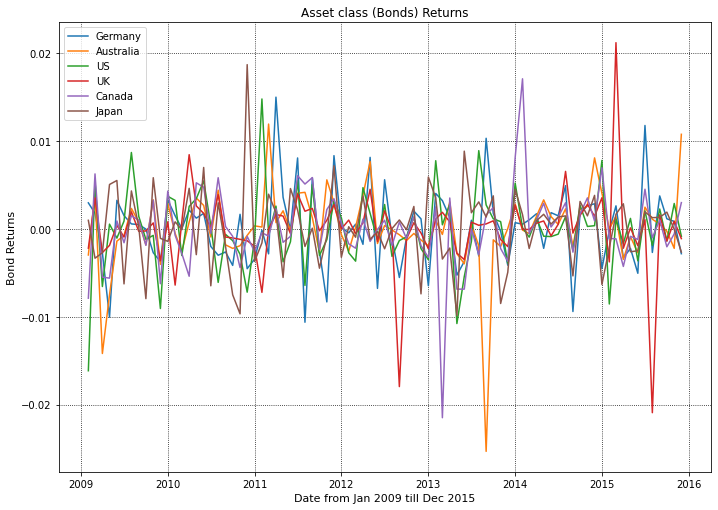

In [27]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df_2009_2015_2.index, bond_df_2009_2015_2.Germany_R, label='Germany')
plt.plot(bond_df_2009_2015_2.index, bond_df_2009_2015_2.Australia_R, label='Australia')
plt.plot(bond_df_2009_2015_2.index, bond_df_2009_2015_2.US_R, label='US')
plt.plot(bond_df_2009_2015_2.index, bond_df_2009_2015_2.UK_R, label='UK')
plt.plot(bond_df_2009_2015_2.index, bond_df_2009_2015_2.Canada_R, label='Canada')
plt.plot(bond_df_2009_2015_2.index, bond_df_2009_2015_2.Japan_R, label='Japan')

plt.title('Asset class (Bonds) Returns')
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=11)
plt.ylabel('Bond Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [28]:
# Adding up all the returns of all asset classes for all countries

In [29]:
bond_df_2009_2015_2['Portfolio_R'] = bond_df_2009_2015_2['Germany_R'] + bond_df_2009_2015_2['Australia_R'] + bond_df_2009_2015_2['US_R'] + bond_df_2009_2015_2['UK_R'] + bond_df_2009_2015_2['Canada_R'] + bond_df_2009_2015_2['Japan_R']

In [30]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [31]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
bond_df_2009_2015_2['Bond_Port_Value'] = ((bond_df_2009_2015_2['Portfolio_R'] + 1).cumprod())*1000

In [32]:
bond_df_2009_2015_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R', 'Portfolio_R', 'Bond_Port_Value']].head(5)

,Germany_R,Australia_R,US_R,UK_R,Canada_R,Japan_R,Portfolio_R,Bond_Port_Value
Date,,,,,,,,
2009-02-01,0.002926,-0.002999,-0.016158,-0.002222,-0.007909,0.000939,-0.025423,974.576957
2009-03-01,0.001744,0.004053,0.005391,0.003506,0.006217,-0.003366,0.017545,991.675540
2009-04-01,-0.002747,-0.014197,-0.006585,-0.002724,-0.005520,-0.002748,-0.034521,957.441853
2009-05-01,-0.010077,-0.007521,0.000505,-0.001907,-0.005632,0.005014,-0.019617,938.659525
2009-06-01,0.003213,-0.001427,-0.001080,0.000366,0.000867,0.005468,0.007408,945.613126


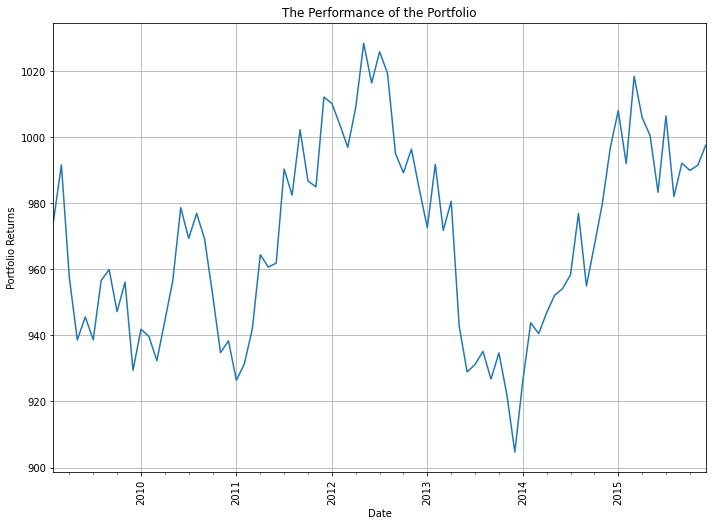

In [33]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2009 till Dec 2015');
plt.ylabel('Portfolio Returns');
bond_df_2009_2015_2['Bond_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [34]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(bond_df_2009_2015_2.Bond_Port_Value.max() - bond_df_2009_2015_2.Bond_Port_Value.min()) / bond_df_2009_2015_2.Bond_Port_Value.max()

0.1203623266972009

In [35]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (bond_df_2009_2015_2['Bond_Port_Value'][-1] / bond_df_2009_2015_2['Bond_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 2.37%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [36]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
bond_df_2009_2015_2['Monthly_Return'] = bond_df_2009_2015_2['Bond_Port_Value'].pct_change(1)

In [37]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = bond_df_2009_2015_2['Monthly_Return'].mean() / bond_df_2009_2015_2['Monthly_Return'].std()
Sharpe_Ratio

0.026152684659891557

In [38]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(83)
Annualized_Sharpe_Ratio

0.23826229651024805

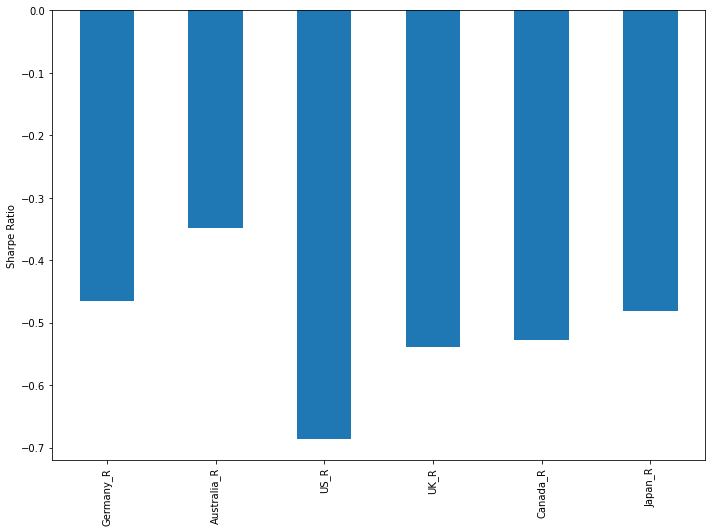

In [39]:
# Calcualte the Sharpe Ratio for bond portfolio
def bond_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = bond_df_2009_2015_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_sharpes = bond_df_2009_2015_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
bond_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

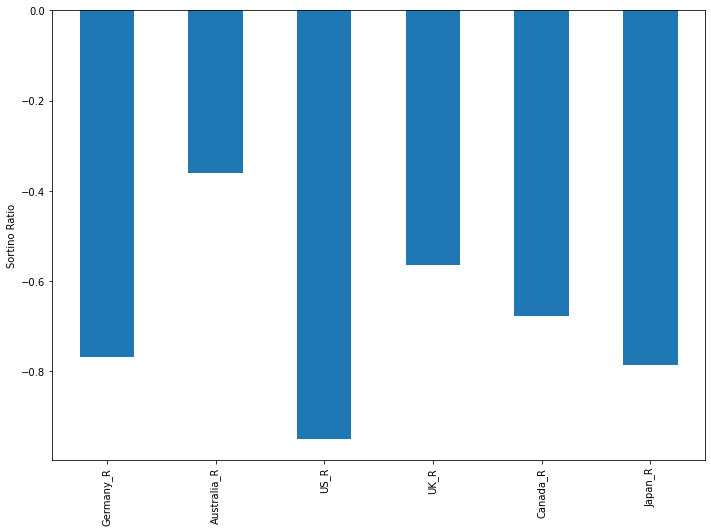

In [40]:
# Calcualte the Sortino Ratio for bond portfolio
def bond_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = bond_df_2009_2015_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_sortinos = bond_df_2009_2015_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
bond_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

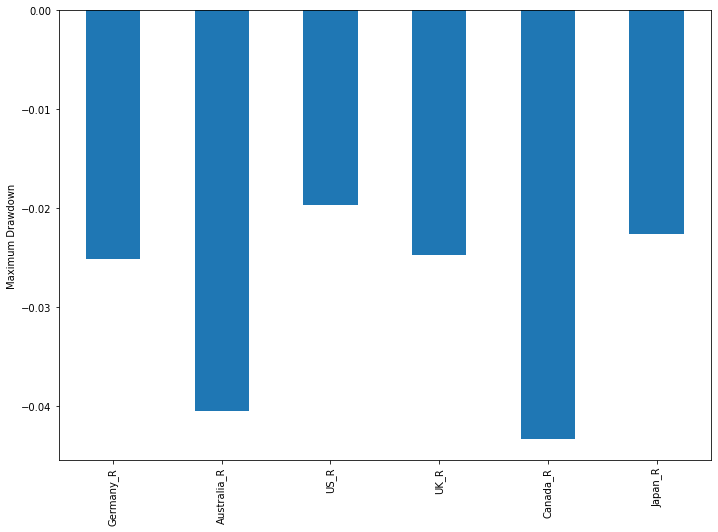

In [41]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def bond_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = bond_df_2009_2015_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_max_drawdown = bond_df_2009_2015_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
bond_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2009 till December 2015.
- Target volatility 4.10 %.
- Maximum Drawdown 12 %.
- Cumulative return of the of portfolio 2.37 %
- Sharpe Ratio 2.61 %.


In [42]:
# Dataset (Equity.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
equity_df_2009_2015 = pd.read_csv('Equity_2009_2015.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(equity_df_2009_2015.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
equity_df_2009_2015.head()

(84, 26)


,Date,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,...,Chile,Brazil,Argentina,Russia,Turkey,Portugal,Finland,South Africa,Indonesia,Venezuela
0,1/1/2009,3540.7,248.60,4338.35,8694.90,1.327821e+10,2.973920e+09,1.900090e+09,825880005.0,7994.05,...,2549.46,39300.79,1077.09,624.90,259.34,6438.19,1448.80,18519.77,1332.67,65337.55
1,2/1/2009,3344.5,219.81,3843.74,8123.02,1.281157e+10,2.702480e+09,1.696580e+09,735090027.0,7568.42,...,2468.63,38183.31,1019.29,666.05,240.27,6003.75,1266.21,16514.30,1285.48,66106.68
2,3/1/2009,3582.1,216.98,4084.76,8720.39,1.357602e+10,2.807340e+09,1.748740e+09,797869995.0,8109.53,...,2478.94,40925.90,1125.95,772.93,257.65,6174.74,1272.38,18441.62,1434.07,67504.11
3,4/1/2009,3780.5,240.76,4769.45,9324.83,1.552099e+10,3.159850e+09,1.953350e+09,872809998.0,8828.26,...,2670.78,47289.50,1275.25,920.35,316.52,6755.70,1596.81,18514.32,1722.77,65282.71
4,5/1/2009,3818.0,259.45,4940.82,10370.07,1.817100e+10,3.277650e+09,2.071370e+09,919140015.0,9522.50,...,3100.42,53197.70,1587.21,1123.38,350.03,7223.90,1651.31,20605.38,1916.83,64768.77


In [43]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df_2009_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          84 non-null     object 
 1   Australia     84 non-null     float64
 2   Nethelands    84 non-null     float64
 3   Germany       84 non-null     float64
 4   Canada        84 non-null     float64
 5   Hong_Kong     84 non-null     float64
 6   France        84 non-null     float64
 7   Belgium       84 non-null     float64
 8   US            84 non-null     float64
 9   Japan         84 non-null     float64
 10  Spain         84 non-null     float64
 11  Sweden        84 non-null     float64
 12  UK            84 non-null     float64
 13  Italy         84 non-null     float64
 14  Singapore     84 non-null     float64
 15  Thailand      84 non-null     float64
 16  Chile         84 non-null     float64
 17  Brazil        84 non-null     float64
 18  Argentina     84 non-null     fl

In [44]:
# Use pandas.to_datetime() function to convert argument to datetime
equity_df_2009_2015['Date'] = pd.to_datetime(equity_df_2009_2015.Date)

In [45]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df_2009_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          84 non-null     datetime64[ns]
 1   Australia     84 non-null     float64       
 2   Nethelands    84 non-null     float64       
 3   Germany       84 non-null     float64       
 4   Canada        84 non-null     float64       
 5   Hong_Kong     84 non-null     float64       
 6   France        84 non-null     float64       
 7   Belgium       84 non-null     float64       
 8   US            84 non-null     float64       
 9   Japan         84 non-null     float64       
 10  Spain         84 non-null     float64       
 11  Sweden        84 non-null     float64       
 12  UK            84 non-null     float64       
 13  Italy         84 non-null     float64       
 14  Singapore     84 non-null     float64       
 15  Thailand      84 non-null     float64     

In [46]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
equity_df_2009_2015.set_index('Date',inplace=True)

In [47]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
equity_df_2009_2015.isnull().any()

Australia       False
Nethelands      False
Germany         False
Canada          False
Hong_Kong       False
France          False
Belgium         False
US              False
Japan           False
Spain           False
Sweden          False
UK              False
Italy           False
Singapore       False
Thailand        False
Chile           False
Brazil          False
Argentina       False
Russia          False
Turkey          False
Portugal        False
Finland         False
South Africa    False
Indonesia       False
Venezuela       False
dtype: bool

In [48]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
equity_df_2009_2015 = equity_df_2009_2015.rename(columns={'France ':'France'})
equity_df_2009_2015 = equity_df_2009_2015.rename(columns={'Japan ':'Japan'})
equity_df_2009_2015 = equity_df_2009_2015.rename(columns={'Sweden ':'Sweden'})
equity_df_2009_2015 = equity_df_2009_2015.rename(columns={'South Africa':'South_Africa'})

In [49]:
equity_df_2009_2015[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                     'US','Japan','Spain','Sweden','UK','Italy','Singapore','Thailand','Chile',
                     'Brazil','Argentina','Russia','Turkey','Portugal','Finland',
                           'South_Africa','Indonesia','Venezuela']].head(3)

,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,Spain,...,Chile,Brazil,Argentina,Russia,Turkey,Portugal,Finland,South_Africa,Indonesia,Venezuela
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,3540.7,248.60,4338.35,8694.90,1.327821e+10,2.973920e+09,1.900090e+09,825880005.0,7994.05,8450.4,...,2549.46,39300.79,1077.09,624.90,259.34,6438.19,1448.80,18519.77,1332.67,65337.55
2009-02-01,3344.5,219.81,3843.74,8123.02,1.281157e+10,2.702480e+09,1.696580e+09,735090027.0,7568.42,7620.9,...,2468.63,38183.31,1019.29,666.05,240.27,6003.75,1266.21,16514.30,1285.48,66106.68
2009-03-01,3582.1,216.98,4084.76,8720.39,1.357602e+10,2.807340e+09,1.748740e+09,797869995.0,8109.53,7815.0,...,2478.94,40925.90,1125.95,772.93,257.65,6174.74,1272.38,18441.62,1434.07,67504.11


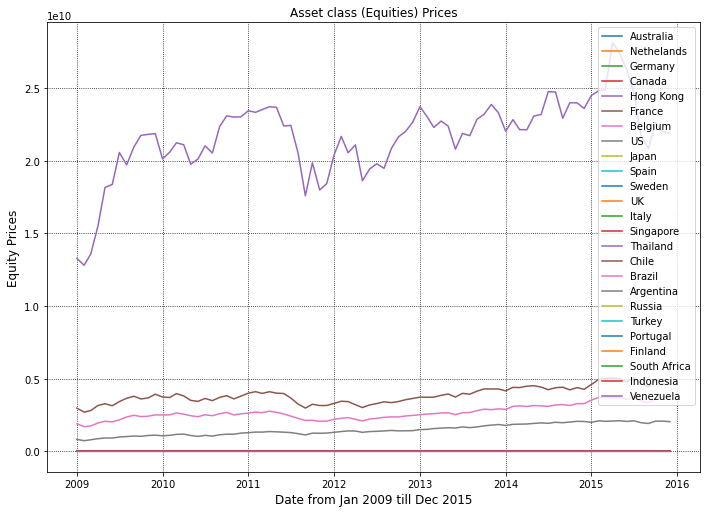

In [50]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Australia, label='Australia')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Nethelands, label='Nethelands')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Germany, label='Germany')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Canada, label='Canada')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Hong_Kong, label='Hong Kong')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.France, label='France')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Belgium, label='Belgium')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.US, label='US')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Japan, label='Japan')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Spain, label='Spain')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Sweden, label='Sweden')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.UK, label='UK')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Italy, label='Italy')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Singapore, label='Singapore')

plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Thailand, label='Thailand')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Chile, label='Chile')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Brazil, label='Brazil')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Argentina, label='Argentina')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Russia, label='Russia')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Turkey, label='Turkey')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Portugal, label='Portugal')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Finland, label='Finland')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.South_Africa, label='South Africa')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Indonesia, label='Indonesia')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Venezuela, label='Venezuela')

plt.title('Asset class (Equities) Prices')
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=12)
plt.ylabel('Equity Prices', fontsize=12)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

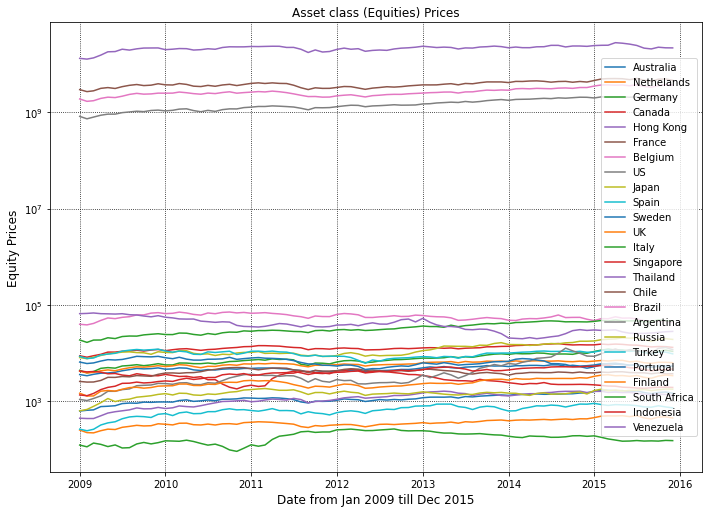

In [51]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Australia, label='Australia')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Nethelands, label='Nethelands')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Germany, label='Germany')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Canada, label='Canada')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Hong_Kong, label='Hong Kong')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.France, label='France')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Belgium, label='Belgium')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.US, label='US')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Japan, label='Japan')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Spain, label='Spain')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Sweden, label='Sweden')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.UK, label='UK')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Italy, label='Italy')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Singapore, label='Singapore')

plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Thailand, label='Thailand')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Chile, label='Chile')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Brazil, label='Brazil')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Argentina, label='Argentina')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Russia, label='Russia')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Turkey, label='Turkey')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Portugal, label='Portugal')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Finland, label='Finland')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.South_Africa, label='South Africa')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Indonesia, label='Indonesia')
plt.plot(equity_df_2009_2015.index, equity_df_2009_2015.Venezuela, label='Venezuela')

plt.title('Asset class (Equities) Prices')
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=12)
plt.ylabel('Equity Prices', fontsize=12)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [52]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
equity_df_2009_2015 = equity_df_2009_2015[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                                           'US','Japan','Spain','Sweden','UK','Italy','Singapore','Thailand','Chile',
                                           'Brazil','Argentina','Russia','Turkey','Portugal','Finland',
                                           'South_Africa','Indonesia','Venezuela']].pct_change()
equity_df_2009_2015.head(5)

,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,Spain,...,Chile,Brazil,Argentina,Russia,Turkey,Portugal,Finland,South_Africa,Indonesia,Venezuela
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-02-01,-0.055413,-0.115809,-0.114009,-0.065772,-0.035143,-0.091273,-0.107105,-0.109931,-0.053243,-0.098161,...,-0.031705,-0.028434,-0.053663,0.065851,-0.073533,-0.067479,-0.126028,-0.108288,-0.035410,0.011772
2009-03-01,0.071042,-0.012875,0.062705,0.073540,0.059669,0.038801,0.030744,0.085404,0.071496,0.025469,...,0.004176,0.071827,0.104641,0.160468,0.072335,0.028481,0.004873,0.116706,0.115591,0.021139
2009-04-01,0.055387,0.109595,0.167621,0.069313,0.143265,0.125567,0.117004,0.093925,0.088628,0.156494,...,0.077388,0.155491,0.132599,0.190729,0.228488,0.094087,0.254979,0.003942,0.201315,-0.032908
2009-05-01,0.009919,0.077629,0.035931,0.112092,0.170737,0.037280,0.060419,0.053081,0.078638,0.042742,...,0.160867,0.124937,0.244627,0.220601,0.105870,0.069304,0.034131,0.112943,0.112644,-0.007873


In [53]:
# Use pandas.DataFrame.dropna() function to remove missing values in rows
equity_df_2009_2015.dropna(axis=0, inplace=True)
equity_df_2009_2015.head(5)

,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,Spain,...,Chile,Brazil,Argentina,Russia,Turkey,Portugal,Finland,South_Africa,Indonesia,Venezuela
Date,,,,,,,,,,,,,,,,,,,,,
2009-02-01,-0.055413,-0.115809,-0.114009,-0.065772,-0.035143,-0.091273,-0.107105,-0.109931,-0.053243,-0.098161,...,-0.031705,-0.028434,-0.053663,0.065851,-0.073533,-0.067479,-0.126028,-0.108288,-0.035410,0.011772
2009-03-01,0.071042,-0.012875,0.062705,0.073540,0.059669,0.038801,0.030744,0.085404,0.071496,0.025469,...,0.004176,0.071827,0.104641,0.160468,0.072335,0.028481,0.004873,0.116706,0.115591,0.021139
2009-04-01,0.055387,0.109595,0.167621,0.069313,0.143265,0.125567,0.117004,0.093925,0.088628,0.156494,...,0.077388,0.155491,0.132599,0.190729,0.228488,0.094087,0.254979,0.003942,0.201315,-0.032908
2009-05-01,0.009919,0.077629,0.035931,0.112092,0.170737,0.037280,0.060419,0.053081,0.078638,0.042742,...,0.160867,0.124937,0.244627,0.220601,0.105870,0.069304,0.034131,0.112943,0.112644,-0.007873
2009-06-01,0.035856,-0.018269,-0.026753,0.000467,0.011432,-0.041862,-0.019499,0.000196,0.045780,0.038571,...,-0.003200,-0.032562,0.000479,-0.135155,0.055595,-0.015645,-0.029734,-0.038139,0.057360,-0.010642


In [54]:
print('There are {} rows in the DataFrame'.format(equity_df_2009_2015.shape[0]))

There are 83 rows in the DataFrame


In [55]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
equity_df_2009_2015_2 = equity_df_2009_2015.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [56]:
vol_equity_df_2009_2015 = equity_df_2009_2015

In [57]:
vol_equity_df_2009_2015.shape[0]

83

In [58]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_equity_df_2009_2015['Australia_Vol'] = vol_equity_df_2009_2015['Australia'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Nethelands_Vol'] = vol_equity_df_2009_2015['Nethelands'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Germany_Vol'] = vol_equity_df_2009_2015['Germany'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Canada_Vol'] = vol_equity_df_2009_2015['Canada'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Hong_Kong_Vol'] = vol_equity_df_2009_2015['Hong_Kong'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['France_Vol'] = vol_equity_df_2009_2015['France'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Belgium_Vol'] = vol_equity_df_2009_2015['Belgium'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['US_Vol'] = vol_equity_df_2009_2015['US'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Japan_Vol'] = vol_equity_df_2009_2015['Japan'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Spain_Vol'] = vol_equity_df_2009_2015['Spain'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Sweden_Vol'] = vol_equity_df_2009_2015['Sweden'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['UK_Vol'] = vol_equity_df_2009_2015['UK'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Italy_Vol'] = vol_equity_df_2009_2015['Italy'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Singapore_Vol'] = vol_equity_df_2009_2015['Singapore'].rolling(83).std() * math.sqrt(83)

vol_equity_df_2009_2015['Thailand_Vol'] = vol_equity_df_2009_2015['Thailand'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Chile_Vol'] = vol_equity_df_2009_2015['Chile'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Brazil_Vol'] = vol_equity_df_2009_2015['Brazil'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Argentina_Vol'] = vol_equity_df_2009_2015['Argentina'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Russia_Vol'] = vol_equity_df_2009_2015['Russia'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Turkey_Vol'] = vol_equity_df_2009_2015['Turkey'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Portugal_Vol'] = vol_equity_df_2009_2015['Portugal'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Finland_Vol'] = vol_equity_df_2009_2015['Finland'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['South_Africa_Vol'] = vol_equity_df_2009_2015['South_Africa'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Indonesia_Vol'] = vol_equity_df_2009_2015['Indonesia'].rolling(83).std() * math.sqrt(83)
vol_equity_df_2009_2015['Venezuela_Vol'] = vol_equity_df_2009_2015['Venezuela'].rolling(83).std() * math.sqrt(83)

In [59]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_equity_df_2009_2015.dropna(axis=0, inplace=True)

In [60]:
vol_equity_df_2009_2015[['Australia_Vol','Nethelands_Vol','Germany_Vol','Canada_Vol','Hong_Kong_Vol','France_Vol',
                         'Belgium_Vol','US_Vol','Japan_Vol','Spain_Vol','Sweden_Vol','UK_Vol','Italy_Vol',
                         'Singapore_Vol','Thailand_Vol','Chile_Vol','Brazil_Vol','Argentina_Vol','Russia_Vol',
                         'Turkey_Vol','Portugal_Vol','Finland_Vol','South_Africa_Vol','Indonesia_Vol','Venezuela_Vol']]

,Australia_Vol,Nethelands_Vol,Germany_Vol,Canada_Vol,Hong_Kong_Vol,France_Vol,Belgium_Vol,US_Vol,Japan_Vol,Spain_Vol,...,Chile_Vol,Brazil_Vol,Argentina_Vol,Russia_Vol,Turkey_Vol,Portugal_Vol,Finland_Vol,South_Africa_Vol,Indonesia_Vol,Venezuela_Vol
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-01,0.349991,0.438677,0.500519,0.309581,0.531991,0.457726,0.381193,0.374954,0.494281,0.564293,...,0.40667,0.529415,0.949571,0.598588,0.655906,0.502171,0.52536,0.397303,0.481937,0.615641


In [61]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_equity = (0.349991+0.438677+0.500519+0.309581+0.531991+0.457726+0.381193+0.374954+0.494281+0.564293+0.402123+0.355103+0.698097+0.687087+0.462618+0.40667+0.529415+0.949571+0.598588+0.655906+0.502171+0.52536+0.397303+0.481937+0.615641) / 25
Avg_vol_equity

0.50683184

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [62]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
target_vol_equity_2009_2015 = 0.50683184 / 25
target_vol_equity_2009_2015

0.020273273600000002

In [63]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_equity_df_2009_2015 = equity_df_2009_2015

In [64]:
port_equity_df_2009_2015['Australia_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Australia_Vol'] 
port_equity_df_2009_2015['Nethelands_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Nethelands_Vol'] 
port_equity_df_2009_2015['Germany_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Germany_Vol'] 
port_equity_df_2009_2015['Canada_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Canada_Vol']
port_equity_df_2009_2015['Hong_Kong_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Hong_Kong_Vol']
port_equity_df_2009_2015['France_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['France_Vol']
port_equity_df_2009_2015['Belgium_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Belgium_Vol']
port_equity_df_2009_2015['US_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['US_Vol']
port_equity_df_2009_2015['Japan_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Japan_Vol']
port_equity_df_2009_2015['Spain_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Spain_Vol']
port_equity_df_2009_2015['Sweden_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Sweden_Vol']
port_equity_df_2009_2015['UK_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['UK_Vol']
port_equity_df_2009_2015['Italy_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Italy_Vol']
port_equity_df_2009_2015['Singapore_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Singapore_Vol']

port_equity_df_2009_2015['Thailand_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Thailand_Vol']
port_equity_df_2009_2015['Chile_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Chile_Vol']
port_equity_df_2009_2015['Brazil_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Brazil_Vol']
port_equity_df_2009_2015['Argentina_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Argentina_Vol']
port_equity_df_2009_2015['Russia_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Russia_Vol']
port_equity_df_2009_2015['Turkey_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Turkey_Vol']
port_equity_df_2009_2015['Portugal_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Portugal_Vol']
port_equity_df_2009_2015['Finland_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Finland_Vol']
port_equity_df_2009_2015['South_Africa_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['South_Africa_Vol']
port_equity_df_2009_2015['Indonesia_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Indonesia_Vol']
port_equity_df_2009_2015['Venezuela_Alloc'] = target_vol_equity_2009_2015 / vol_equity_df_2009_2015['Venezuela_Vol']


In [65]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_equity_df_2009_2015.dropna(axis=0, inplace=True)

In [66]:
port_equity_df_2009_2015[['Australia_Alloc','Nethelands_Alloc','Germany_Alloc','Canada_Alloc','Hong_Kong_Alloc',
                          'France_Alloc','Belgium_Alloc','US_Alloc','Japan_Alloc','Spain_Alloc','Sweden_Alloc',
                          'UK_Alloc','Italy_Alloc','Singapore_Alloc','Thailand_Alloc','Chile_Alloc',
                          'Brazil_Alloc','Argentina_Alloc','Russia_Alloc','Turkey_Alloc','Portugal_Alloc',
                          'Finland_Alloc','South_Africa_Alloc','Indonesia_Alloc','Venezuela_Alloc']]

,Australia_Alloc,Nethelands_Alloc,Germany_Alloc,Canada_Alloc,Hong_Kong_Alloc,France_Alloc,Belgium_Alloc,US_Alloc,Japan_Alloc,Spain_Alloc,...,Chile_Alloc,Brazil_Alloc,Argentina_Alloc,Russia_Alloc,Turkey_Alloc,Portugal_Alloc,Finland_Alloc,South_Africa_Alloc,Indonesia_Alloc,Venezuela_Alloc
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-01,0.057925,0.046215,0.040504,0.065486,0.038108,0.044291,0.053184,0.054069,0.041016,0.035927,...,0.049852,0.038294,0.02135,0.033868,0.030909,0.040371,0.038589,0.051027,0.042066,0.03293


In [67]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (equities)

In [68]:
equity_df_2009_2015_2['Australia_R'] = equity_df_2009_2015_2['Australia'] * 0.057925
equity_df_2009_2015_2['Nethelands_R'] = equity_df_2009_2015_2['Nethelands'] * 0.046215
equity_df_2009_2015_2['Germany_R'] = equity_df_2009_2015_2['Germany'] * 0.040504
equity_df_2009_2015_2['Canada_R'] = equity_df_2009_2015_2['Canada'] * 0.065486
equity_df_2009_2015_2['Hong_Kong_R'] = equity_df_2009_2015_2['Hong_Kong'] * 0.038108
equity_df_2009_2015_2['France_R'] = equity_df_2009_2015_2['France'] * 0.044291
equity_df_2009_2015_2['Belgium_R'] = equity_df_2009_2015_2['Belgium'] * 0.053184
equity_df_2009_2015_2['US_R'] = equity_df_2009_2015_2['US'] * 0.054069
equity_df_2009_2015_2['Japan_R'] = equity_df_2009_2015_2['Japan'] * 0.041016
equity_df_2009_2015_2['Spain_R'] = equity_df_2009_2015_2['Spain'] * 0.035927
equity_df_2009_2015_2['Sweden_R'] = equity_df_2009_2015_2['Sweden'] * 0.050416
equity_df_2009_2015_2['UK_R'] = equity_df_2009_2015_2['UK'] * 0.057091
equity_df_2009_2015_2['Italy_R'] = equity_df_2009_2015_2['Italy'] * 0.029041
equity_df_2009_2015_2['Singapore_R'] = equity_df_2009_2015_2['Singapore'] * 0.029506  

equity_df_2009_2015_2['Thailand_R'] = equity_df_2009_2015_2['Thailand'] * 0.043823
equity_df_2009_2015_2['Chile_R'] = equity_df_2009_2015_2['Chile'] * 0.049852
equity_df_2009_2015_2['Brazil_R'] = equity_df_2009_2015_2['Brazil'] * 0.038294
equity_df_2009_2015_2['Argentina_R'] = equity_df_2009_2015_2['Argentina'] * 0.02135
equity_df_2009_2015_2['Russia_R'] = equity_df_2009_2015_2['Russia'] * 0.033868
equity_df_2009_2015_2['Turkey_R'] = equity_df_2009_2015_2['Turkey'] * 0.030909
equity_df_2009_2015_2['Portugal_R'] = equity_df_2009_2015_2['Portugal'] * 0.040371
equity_df_2009_2015_2['Finland_R'] = equity_df_2009_2015_2['Finland'] * 0.038589
equity_df_2009_2015_2['South_Africa_R'] = equity_df_2009_2015_2['South_Africa'] * 0.051027
equity_df_2009_2015_2['Indonesia_R'] = equity_df_2009_2015_2['Indonesia'] * 0.042066
equity_df_2009_2015_2['Venezuela_R'] = equity_df_2009_2015_2['Venezuela'] * 0.03293

In [69]:
equity_df_2009_2015_2.head(5)

,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,Spain,...,Chile_R,Brazil_R,Argentina_R,Russia_R,Turkey_R,Portugal_R,Finland_R,South_Africa_R,Indonesia_R,Venezuela_R
Date,,,,,,,,,,,,,,,,,,,,,
2009-02-01,-0.055413,-0.115809,-0.114009,-0.065772,-0.035143,-0.091273,-0.107105,-0.109931,-0.053243,-0.098161,...,-0.001581,-0.001089,-0.001146,0.002230,-0.002273,-0.002724,-0.004863,-0.005526,-0.001490,0.000388
2009-03-01,0.071042,-0.012875,0.062705,0.073540,0.059669,0.038801,0.030744,0.085404,0.071496,0.025469,...,0.000208,0.002751,0.002234,0.005435,0.002236,0.001150,0.000188,0.005955,0.004862,0.000696
2009-04-01,0.055387,0.109595,0.167621,0.069313,0.143265,0.125567,0.117004,0.093925,0.088628,0.156494,...,0.003858,0.005954,0.002831,0.006460,0.007062,0.003798,0.009839,0.000201,0.008469,-0.001084
2009-05-01,0.009919,0.077629,0.035931,0.112092,0.170737,0.037280,0.060419,0.053081,0.078638,0.042742,...,0.008020,0.004784,0.005223,0.007471,0.003272,0.002798,0.001317,0.005763,0.004738,-0.000259
2009-06-01,0.035856,-0.018269,-0.026753,0.000467,0.011432,-0.041862,-0.019499,0.000196,0.045780,0.038571,...,-0.000160,-0.001247,0.000010,-0.004577,0.001718,-0.000632,-0.001147,-0.001946,0.002413,-0.000350


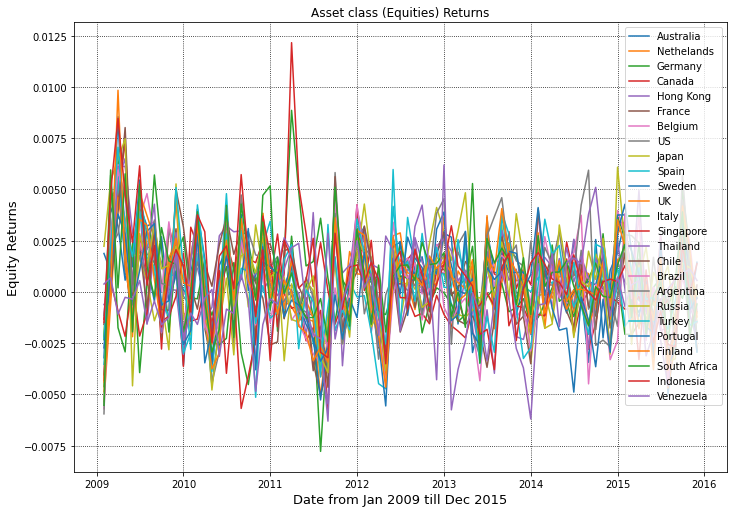

In [70]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Australia_R, label='Australia')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Nethelands_R, label='Nethelands')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Germany_R, label='Germany')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Canada_R, label='Canada')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Hong_Kong_R, label='Hong Kong')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.France_R, label='France')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Belgium_R, label='Belgium')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.US_R, label='US')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Japan_R, label='Japan')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Spain_R, label='Spain')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Sweden_R, label='Sweden')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.UK_R, label='UK')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Italy_R, label='Italy')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Singapore_R, label='Singapore')

plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Thailand_R, label='Thailand')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Chile_R, label='Chile')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Brazil_R, label='Brazil')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Argentina_R, label='Argentina')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Russia_R, label='Russia')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Turkey_R, label='Turkey')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Portugal_R, label='Portugal')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Finland_R, label='Finland')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.South_Africa_R, label='South Africa')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Indonesia_R, label='Indonesia')
plt.plot(equity_df_2009_2015_2.index, equity_df_2009_2015_2.Venezuela_R, label='Venezuela')

plt.title('Asset class (Equities) Returns')
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=13)
plt.ylabel('Equity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [71]:
# Adding up all the returns of all asset classes for all countries

In [72]:
equity_df_2009_2015_2['Portfolio_R'] = equity_df_2009_2015_2['Australia_R'] + equity_df_2009_2015_2['Nethelands_R'] + equity_df_2009_2015_2['Germany_R'] + equity_df_2009_2015_2['Canada_R'] + equity_df_2009_2015_2['Hong_Kong_R'] + equity_df_2009_2015_2['France_R'] + equity_df_2009_2015_2['Belgium_R'] + equity_df_2009_2015_2['US_R'] + equity_df_2009_2015_2['Japan_R'] + equity_df_2009_2015_2['Spain_R'] + equity_df_2009_2015_2['Sweden_R'] + equity_df_2009_2015_2['UK_R'] + equity_df_2009_2015_2['Italy_R'] + equity_df_2009_2015_2['Singapore_R'] + equity_df_2009_2015_2['Thailand_R'] + equity_df_2009_2015_2['Chile_R'] + equity_df_2009_2015_2['Brazil_R'] + equity_df_2009_2015_2['Argentina_R'] + equity_df_2009_2015_2['Russia_R'] + equity_df_2009_2015_2['Turkey_R'] + equity_df_2009_2015_2['Portugal_R'] + equity_df_2009_2015_2['Finland_R'] + equity_df_2009_2015_2['South_Africa_R'] + equity_df_2009_2015_2['Indonesia_R'] + equity_df_2009_2015_2['Venezuela_R']

In [73]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [74]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
equity_df_2009_2015_2['Equity_Port_Value'] = ((equity_df_2009_2015_2['Portfolio_R'] + 1).cumprod())*1000

In [75]:
equity_df_2009_2015_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
                       'Singapore_R', 'Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R',
                       'Turkey_R','Portugal_R','Finland_R','South_Africa_R','Indonesia_R',
                       'Venezuela_R', 'Portfolio_R', 'Equity_Port_Value']].head(5)

,Australia_R,Nethelands_R,Germany_R,Canada_R,Hong_Kong_R,France_R,Belgium_R,US_R,Japan_R,Spain_R,...,Argentina_R,Russia_R,Turkey_R,Portugal_R,Finland_R,South_Africa_R,Indonesia_R,Venezuela_R,Portfolio_R,Equity_Port_Value
Date,,,,,,,,,,,,,,,,,,,,,
2009-02-01,-0.003210,-0.005352,-0.004618,-0.004307,-0.001339,-0.004043,-0.005696,-0.005944,-0.002184,-0.003527,...,-0.001146,0.002230,-0.002273,-0.002724,-0.004863,-0.005526,-0.001490,0.000388,-0.065079,934.921190
2009-03-01,0.004115,-0.000595,0.002540,0.004816,0.002274,0.001719,0.001635,0.004618,0.002932,0.000915,...,0.002234,0.005435,0.002236,0.001150,0.000188,0.005955,0.004862,0.000696,0.059321,990.381659
2009-04-01,0.003208,0.005065,0.006789,0.004539,0.005460,0.005561,0.006223,0.005078,0.003635,0.005622,...,0.002831,0.006460,0.007062,0.003798,0.009839,0.000201,0.008469,-0.001084,0.115192,1104.465548
2009-05-01,0.000575,0.003588,0.001455,0.007340,0.006506,0.001651,0.003213,0.002870,0.003225,0.001536,...,0.005223,0.007471,0.003272,0.002798,0.001317,0.005763,0.004738,-0.000259,0.079301,1192.050293
2009-06-01,0.002077,-0.000844,-0.001084,0.000031,0.000436,-0.001854,-0.001037,0.000011,0.001878,0.001386,...,0.000010,-0.004577,0.001718,-0.000632,-0.001147,-0.001946,0.002413,-0.000350,-0.000160,1191.860117


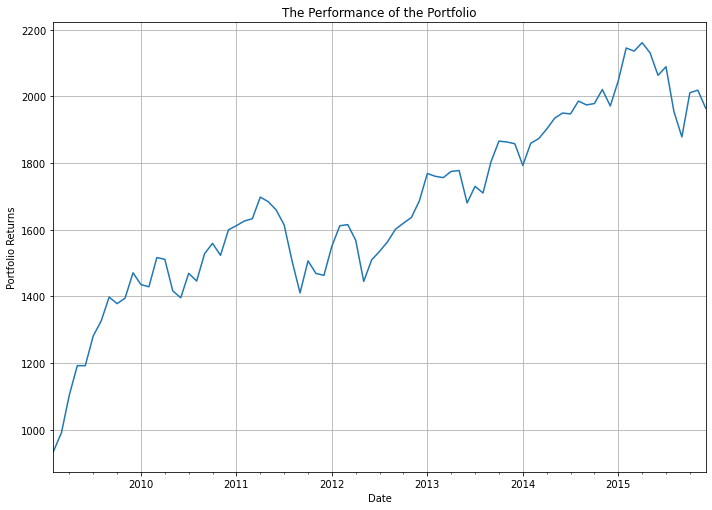

In [76]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date');
plt.ylabel('Portfolio Returns');
equity_df_2009_2015_2['Equity_Port_Value'].plot(grid=True)
# plt.xticks(rotation=90);
plt.show();

In [77]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(equity_df_2009_2015_2.Equity_Port_Value.max() - equity_df_2009_2015_2.Equity_Port_Value.min()) / equity_df_2009_2015_2.Equity_Port_Value.max()

0.5673001086174121

In [78]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (equity_df_2009_2015_2['Equity_Port_Value'][-1] / equity_df_2009_2015_2['Equity_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 110.06%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [79]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
equity_df_2009_2015_2['Monthly_Return'] = equity_df_2009_2015_2['Equity_Port_Value'].pct_change(1)

In [80]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = equity_df_2009_2015_2['Monthly_Return'].mean() / equity_df_2009_2015_2['Monthly_Return'].std()
Sharpe_Ratio

0.26301978149679434

In [81]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(83)
Annualized_Sharpe_Ratio

2.3962242493275916

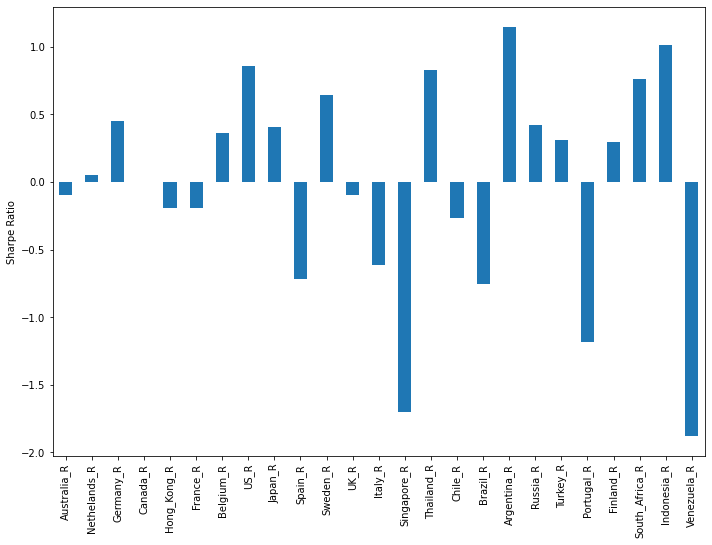

In [82]:
# Calcualte the Sharpe Ratio for equity portfolio
def equity_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = equity_df_2009_2015_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_sharpes = equity_df_2009_2015_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']].apply(equity_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
equity_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

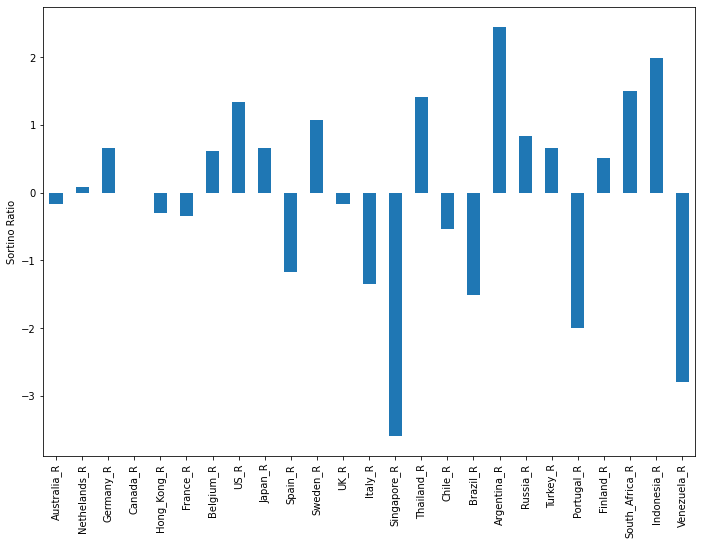

In [83]:
# Calcualte the Sortino Ratio for equity portfolio
def equity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = equity_df_2009_2015_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_sortinos = equity_df_2009_2015_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']].apply(equity_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
equity_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

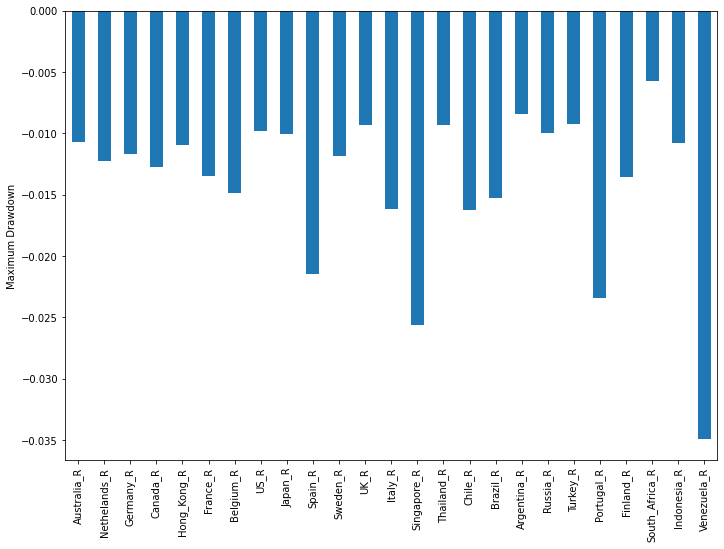

In [84]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def equity_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = equity_df_2009_2015_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_max_drawdown = equity_df_2009_2015_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R','Thailand_R','Chile_R','Brazil_R','Argentina_R',
                                       'Russia_R','Turkey_R','Portugal_R','Finland_R','South_Africa_R',
                                       'Indonesia_R','Venezuela_R']].apply(equity_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
equity_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2009 till December 2015.
- Target volatility 2 %.
- Maximum Drawdown 56.73 %.
- Cumulative return of the of portfolio 110 %
- Sharpe Ratio 26.30 %.


In [85]:
# Dataset (Commodity.csv) from Master Equity Portfolio Excel file
# Dataset includes: Gold, WTI (West Texas Intermediate Crude Oil), Heat Oil, Natural Gas, Silver, US Coffee,
# US Corn, Wheat, Copper, Platinum, and Cocoa

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
commodity_df_2009_2015 = pd.read_csv('Commodity_2009_2015.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(commodity_df_2009_2015.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
commodity_df_2009_2015.head()

(84, 12)


,Date,Gold,WTI,Heat_Oil,Natural_Gas,Silver,US_Coffee,US_Corn,Wheat,Copper,Platinum,Cocoa
0,1/1/2009,927.3,41.68,2.55,4417.0,12560.0,118.90,379.00,568.00,14620.0,1778.2,3170.0
1,2/1/2009,941.5,44.76,2.34,4198.0,13085.0,109.45,350.75,510.50,15260.0,1650.4,2979.0
2,3/1/2009,922.6,49.66,2.24,3776.0,12975.0,115.75,404.75,532.75,18390.0,1708.1,3007.0
3,4/1/2009,890.7,51.12,2.27,3373.0,12305.0,115.00,396.25,524.25,20530.0,1658.6,2858.0
4,5/1/2009,978.8,66.31,1.99,3835.0,15600.0,137.40,436.25,637.25,21970.0,1523.5,2789.0


In [86]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df_2009_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         84 non-null     object 
 1   Gold         84 non-null     float64
 2   WTI          84 non-null     float64
 3   Heat_Oil     84 non-null     float64
 4   Natural_Gas  84 non-null     float64
 5   Silver       84 non-null     float64
 6   US_Coffee    84 non-null     float64
 7   US_Corn      84 non-null     float64
 8   Wheat        84 non-null     float64
 9   Copper       84 non-null     float64
 10  Platinum     84 non-null     float64
 11  Cocoa        84 non-null     float64
dtypes: float64(11), object(1)
memory usage: 8.0+ KB


In [87]:
# Use pandas.to_datetime() function to convert argument to datetime
commodity_df_2009_2015['Date'] = pd.to_datetime(commodity_df_2009_2015.Date)

In [88]:
# Use pandas.DataFrame.astype() function to casta pandas object to a specified data type
commodity_df_2009_2015['Natural_Gas'] = commodity_df_2009_2015['Natural_Gas'].astype(float)
commodity_df_2009_2015['Silver'] = commodity_df_2009_2015['Silver'].astype(float)
commodity_df_2009_2015['Copper'] = commodity_df_2009_2015['Copper'].astype(float)
commodity_df_2009_2015['Cocoa'] = commodity_df_2009_2015['Cocoa'].astype(float)

In [89]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df_2009_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         84 non-null     datetime64[ns]
 1   Gold         84 non-null     float64       
 2   WTI          84 non-null     float64       
 3   Heat_Oil     84 non-null     float64       
 4   Natural_Gas  84 non-null     float64       
 5   Silver       84 non-null     float64       
 6   US_Coffee    84 non-null     float64       
 7   US_Corn      84 non-null     float64       
 8   Wheat        84 non-null     float64       
 9   Copper       84 non-null     float64       
 10  Platinum     84 non-null     float64       
 11  Cocoa        84 non-null     float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 8.0 KB


In [90]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
commodity_df_2009_2015.set_index('Date',inplace=True)

In [91]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
commodity_df_2009_2015.isnull().any()

Gold           False
WTI            False
Heat_Oil       False
Natural_Gas    False
Silver         False
US_Coffee      False
US_Corn        False
Wheat          False
Copper         False
Platinum       False
Cocoa          False
dtype: bool

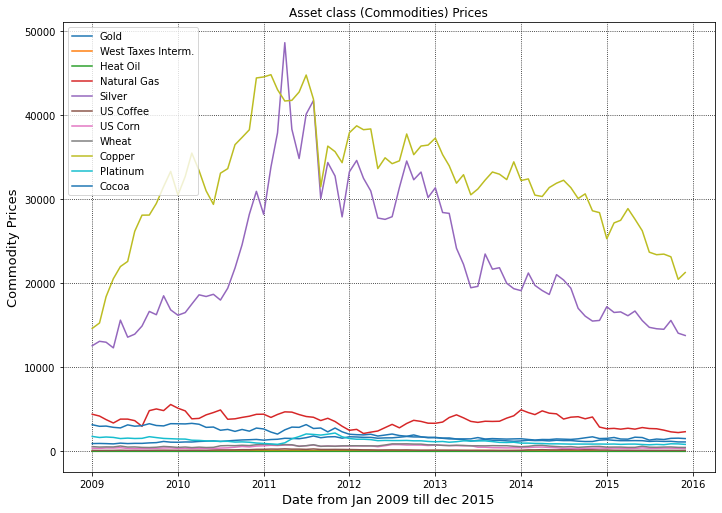

In [92]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.Gold, label='Gold')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.WTI, label='West Taxes Interm.')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.Heat_Oil, label='Heat Oil')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.Natural_Gas, label='Natural Gas')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.Silver, label='Silver')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.US_Coffee, label='US Coffee')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.US_Corn, label='US Corn')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.Wheat, label='Wheat')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.Copper, label='Copper')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.Platinum, label='Platinum')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.Cocoa, label='Cocoa')

plt.title('Asset class (Commodities) Prices')
plt.xlabel('Date from Jan 2009 till dec 2015', fontsize=13)
plt.ylabel('Commodity Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

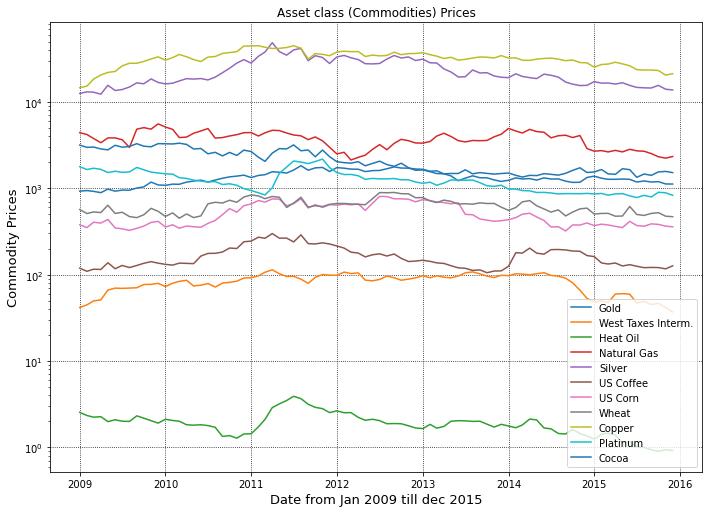

In [93]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.Gold, label='Gold')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.WTI, label='West Taxes Interm.')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.Heat_Oil, label='Heat Oil')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.Natural_Gas, label='Natural Gas')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.Silver, label='Silver')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.US_Coffee, label='US Coffee')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.US_Corn, label='US Corn')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.Wheat, label='Wheat')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.Copper, label='Copper')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.Platinum, label='Platinum')
plt.plot(commodity_df_2009_2015.index, commodity_df_2009_2015.Cocoa, label='Cocoa')

plt.title('Asset class (Commodities) Prices')
plt.xlabel('Date from Jan 2009 till dec 2015', fontsize=13)
plt.ylabel('Commodity Prices', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [94]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
commodity_df_2009_2015 = commodity_df_2009_2015[['Gold','WTI','Heat_Oil','Natural_Gas','Silver','US_Coffee',
                                                 'US_Corn','Wheat','Copper','Platinum','Cocoa']].pct_change()
commodity_df_2009_2015.head(5)

,Gold,WTI,Heat_Oil,Natural_Gas,Silver,US_Coffee,US_Corn,Wheat,Copper,Platinum,Cocoa
Date,,,,,,,,,,,
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-02-01,0.015313,0.073896,-0.082353,-0.049581,0.041799,-0.079479,-0.074538,-0.101232,0.043776,-0.071870,-0.060252
2009-03-01,-0.020074,0.109473,-0.042735,-0.100524,-0.008407,0.057561,0.153956,0.043585,0.205111,0.034961,0.009399
2009-04-01,-0.034576,0.029400,0.013393,-0.106727,-0.051638,-0.006479,-0.021001,-0.015955,0.116368,-0.028980,-0.049551
2009-05-01,0.098911,0.297144,-0.123348,0.136970,0.267777,0.194783,0.100946,0.215546,0.070141,-0.081454,-0.024143


In [95]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
commodity_df_2009_2015.dropna(axis=0, inplace=True)
commodity_df_2009_2015.head(5)

,Gold,WTI,Heat_Oil,Natural_Gas,Silver,US_Coffee,US_Corn,Wheat,Copper,Platinum,Cocoa
Date,,,,,,,,,,,
2009-02-01,0.015313,0.073896,-0.082353,-0.049581,0.041799,-0.079479,-0.074538,-0.101232,0.043776,-0.071870,-0.060252
2009-03-01,-0.020074,0.109473,-0.042735,-0.100524,-0.008407,0.057561,0.153956,0.043585,0.205111,0.034961,0.009399
2009-04-01,-0.034576,0.029400,0.013393,-0.106727,-0.051638,-0.006479,-0.021001,-0.015955,0.116368,-0.028980,-0.049551
2009-05-01,0.098911,0.297144,-0.123348,0.136970,0.267777,0.194783,0.100946,0.215546,0.070141,-0.081454,-0.024143
2009-06-01,-0.052820,0.053989,0.050251,0.000000,-0.129872,-0.146288,-0.202865,-0.197725,0.027765,0.034985,0.129796


In [96]:
print('There are {} rows in the DataFrame'.format(commodity_df_2009_2015.shape[0]))

There are 83 rows in the DataFrame


In [97]:
# Use pandas.DataFrame.copy() function to make a copy of commodity_df
commodity_df_2009_2015_2 = commodity_df_2009_2015.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [98]:
vol_com_df_2009_2015 = commodity_df_2009_2015

In [99]:
vol_com_df_2009_2015.shape[0]

83

In [100]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_com_df_2009_2015['Gold_Vol'] = vol_com_df_2009_2015['Gold'].rolling(83).std() * math.sqrt(83)
vol_com_df_2009_2015['WTI_Vol'] = vol_com_df_2009_2015['WTI'].rolling(83).std() * math.sqrt(83)
vol_com_df_2009_2015['Heat_Oil_Vol'] = vol_com_df_2009_2015['Heat_Oil'].rolling(83).std() * math.sqrt(83)
vol_com_df_2009_2015['Natural_Gas_Vol'] = vol_com_df_2009_2015['Natural_Gas'].rolling(83).std() * math.sqrt(83)
vol_com_df_2009_2015['Silver_Vol'] = vol_com_df_2009_2015['Silver'].rolling(83).std() * math.sqrt(83)
vol_com_df_2009_2015['US_Coffee_Vol'] = vol_com_df_2009_2015['US_Coffee'].rolling(83).std() * math.sqrt(83)
vol_com_df_2009_2015['US_Corn_Vol'] = vol_com_df_2009_2015['US_Corn'].rolling(83).std() * math.sqrt(83)
vol_com_df_2009_2015['Wheat_Vol'] = vol_com_df_2009_2015['Wheat'].rolling(83).std() * math.sqrt(83)
vol_com_df_2009_2015['Copper_Vol'] = vol_com_df_2009_2015['Copper'].rolling(83).std() * math.sqrt(83)
vol_com_df_2009_2015['Platinum_Vol'] = vol_com_df_2009_2015['Platinum'].rolling(83).std() * math.sqrt(83)
vol_com_df_2009_2015['Cocoa_Vol'] = vol_com_df_2009_2015['Cocoa'].rolling(83).std() * math.sqrt(83)

In [101]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_com_df_2009_2015.dropna(axis=0, inplace=True)

In [102]:
vol_com_df_2009_2015[['Gold_Vol','WTI_Vol','Heat_Oil_Vol','Natural_Gas_Vol','Silver_Vol','US_Coffee_Vol','US_Corn_Vol',
                      'Wheat_Vol','Copper_Vol','Platinum_Vol','Cocoa_Vol']]

,Gold_Vol,WTI_Vol,Heat_Oil_Vol,Natural_Gas_Vol,Silver_Vol,US_Coffee_Vol,US_Corn_Vol,Wheat_Vol,Copper_Vol,Platinum_Vol,Cocoa_Vol
Date,,,,,,,,,,,
2015-12-01,0.493452,0.789798,0.883368,1.078551,0.930039,0.863017,0.877161,0.984475,0.642911,0.757306,0.775378


**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [103]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility_com = (0.493452+0.789798+0.883368+1.078551+0.930039+0.863017+0.877161+0.984475+0.642911+0.757306+0.775378) / 11
volatility_com

0.8250414545454546

In [104]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
commodity_target_vol = 0.8250414545454546 / 11
commodity_target_vol

0.07500376859504133

In [105]:
# Create a new dataframe called commodity_portfolio_df which calculates the allocation to each asset class 
port_com_df_2009_2015 = commodity_df_2009_2015

In [106]:
port_com_df_2009_2015['Gold_Alloc'] = commodity_target_vol / vol_com_df_2009_2015['Gold_Vol']
port_com_df_2009_2015['WTI_Alloc'] = commodity_target_vol / vol_com_df_2009_2015['WTI_Vol']
port_com_df_2009_2015['Heat_Oil_Alloc'] = commodity_target_vol / vol_com_df_2009_2015['Heat_Oil_Vol']
port_com_df_2009_2015['Natural_Gas_Alloc'] = commodity_target_vol / vol_com_df_2009_2015['Natural_Gas_Vol']
port_com_df_2009_2015['Silver_Alloc'] = commodity_target_vol / vol_com_df_2009_2015['Silver_Vol']
port_com_df_2009_2015['US_Coffee_Alloc'] = commodity_target_vol / vol_com_df_2009_2015['US_Coffee_Vol']
port_com_df_2009_2015['US_Corn_Alloc'] = commodity_target_vol / vol_com_df_2009_2015['US_Corn_Vol']
port_com_df_2009_2015['Wheat_Alloc'] = commodity_target_vol / vol_com_df_2009_2015['Wheat_Vol']
port_com_df_2009_2015['Copper_Alloc'] = commodity_target_vol / vol_com_df_2009_2015['Copper_Vol']
port_com_df_2009_2015['Platinum_Alloc'] = commodity_target_vol / vol_com_df_2009_2015['Platinum_Vol']
port_com_df_2009_2015['Cocoa_Alloc'] = commodity_target_vol / vol_com_df_2009_2015['Cocoa_Vol']

In [107]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_com_df_2009_2015.dropna(axis=0, inplace=True)

In [108]:
port_com_df_2009_2015[['Gold_Alloc','WTI_Alloc','Heat_Oil_Alloc','Natural_Gas_Alloc','Silver_Alloc',
                        'US_Coffee_Alloc','US_Corn_Alloc','Wheat_Alloc','Copper_Alloc','Platinum_Alloc','Cocoa_Alloc']]

,Gold_Alloc,WTI_Alloc,Heat_Oil_Alloc,Natural_Gas_Alloc,Silver_Alloc,US_Coffee_Alloc,US_Corn_Alloc,Wheat_Alloc,Copper_Alloc,Platinum_Alloc,Cocoa_Alloc
Date,,,,,,,,,,,
2015-12-01,0.151998,0.094966,0.084907,0.069541,0.080646,0.086909,0.085507,0.076187,0.116663,0.09904,0.096732


In [109]:
# I will multiply the monthly commodity prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (Commodity)

In [110]:
commodity_df_2009_2015_2['Gold_R'] = commodity_df_2009_2015_2['Gold'] * 0.151998
commodity_df_2009_2015_2['WTI_R'] = commodity_df_2009_2015_2['WTI'] * 0.094966
commodity_df_2009_2015_2['Heat_Oil_R'] = commodity_df_2009_2015_2['Heat_Oil'] * 0.084907
commodity_df_2009_2015_2['Natural_Gas_R'] = commodity_df_2009_2015_2['Natural_Gas'] * 0.069541
commodity_df_2009_2015_2['Silver_R'] = commodity_df_2009_2015_2['Silver'] * 0.080646
commodity_df_2009_2015_2['US_Coffee_R'] = commodity_df_2009_2015_2['US_Coffee'] * 0.086909
commodity_df_2009_2015_2['US_Corn_R'] = commodity_df_2009_2015_2['US_Corn'] * 0.085507
commodity_df_2009_2015_2['Wheat_R'] = commodity_df_2009_2015_2['Wheat'] * 0.076187
commodity_df_2009_2015_2['Copper_R'] = commodity_df_2009_2015_2['Copper'] * 0.116663
commodity_df_2009_2015_2['Platinum_R'] = commodity_df_2009_2015_2['Platinum'] * 0.09904
commodity_df_2009_2015_2['Cocoa_R'] = commodity_df_2009_2015_2['Cocoa'] * 0.096732

In [111]:
commodity_df_2009_2015_2.head(5)

,Gold,WTI,Heat_Oil,Natural_Gas,Silver,US_Coffee,US_Corn,Wheat,Copper,Platinum,...,WTI_R,Heat_Oil_R,Natural_Gas_R,Silver_R,US_Coffee_R,US_Corn_R,Wheat_R,Copper_R,Platinum_R,Cocoa_R
Date,,,,,,,,,,,,,,,,,,,,,
2009-02-01,0.015313,0.073896,-0.082353,-0.049581,0.041799,-0.079479,-0.074538,-0.101232,0.043776,-0.071870,...,0.007018,-0.006992,-0.003448,0.003371,-0.006907,-0.006374,-0.007713,0.005107,-0.007118,-0.005828
2009-03-01,-0.020074,0.109473,-0.042735,-0.100524,-0.008407,0.057561,0.153956,0.043585,0.205111,0.034961,...,0.010396,-0.003629,-0.006991,-0.000678,0.005003,0.013164,0.003321,0.023929,0.003463,0.000909
2009-04-01,-0.034576,0.029400,0.013393,-0.106727,-0.051638,-0.006479,-0.021001,-0.015955,0.116368,-0.028980,...,0.002792,0.001137,-0.007422,-0.004164,-0.000563,-0.001796,-0.001216,0.013576,-0.002870,-0.004793
2009-05-01,0.098911,0.297144,-0.123348,0.136970,0.267777,0.194783,0.100946,0.215546,0.070141,-0.081454,...,0.028219,-0.010473,0.009525,0.021595,0.016928,0.008632,0.016422,0.008183,-0.008067,-0.002335
2009-06-01,-0.052820,0.053989,0.050251,0.000000,-0.129872,-0.146288,-0.202865,-0.197725,0.027765,0.034985,...,0.005127,0.004267,0.000000,-0.010474,-0.012714,-0.017346,-0.015064,0.003239,0.003465,0.012555


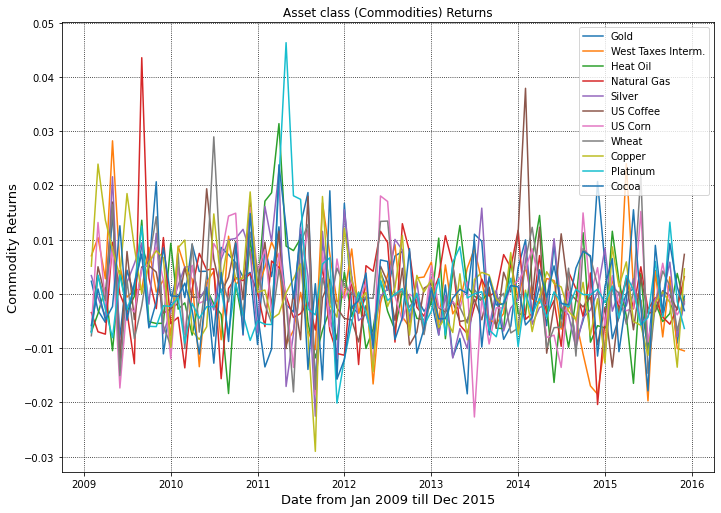

In [112]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2009_2015_2.index, commodity_df_2009_2015_2.Gold_R, label='Gold')
plt.plot(commodity_df_2009_2015_2.index, commodity_df_2009_2015_2.WTI_R, label='West Taxes Interm.')
plt.plot(commodity_df_2009_2015_2.index, commodity_df_2009_2015_2.Heat_Oil_R, label='Heat Oil')
plt.plot(commodity_df_2009_2015_2.index, commodity_df_2009_2015_2.Natural_Gas_R, label='Natural Gas')
plt.plot(commodity_df_2009_2015_2.index, commodity_df_2009_2015_2.Silver_R, label='Silver')
plt.plot(commodity_df_2009_2015_2.index, commodity_df_2009_2015_2.US_Coffee_R, label='US Coffee')
plt.plot(commodity_df_2009_2015_2.index, commodity_df_2009_2015_2.US_Corn_R, label='US Corn')
plt.plot(commodity_df_2009_2015_2.index, commodity_df_2009_2015_2.Wheat_R, label='Wheat')
plt.plot(commodity_df_2009_2015_2.index, commodity_df_2009_2015_2.Copper_R, label='Copper')
plt.plot(commodity_df_2009_2015_2.index, commodity_df_2009_2015_2.Platinum_R, label='Platinum')
plt.plot(commodity_df_2009_2015_2.index, commodity_df_2009_2015_2.Cocoa_R, label='Cocoa')

plt.title('Asset class (Commodities) Returns')
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=13)
plt.ylabel('Commodity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [113]:
# Adding up all the returns of all asset classes for all commodities

In [114]:
commodity_df_2009_2015_2['Portfolio_R'] = commodity_df_2009_2015_2['Gold_R'] + commodity_df_2009_2015_2['WTI_R'] + commodity_df_2009_2015_2['Heat_Oil_R'] + commodity_df_2009_2015_2['Natural_Gas_R'] + commodity_df_2009_2015_2['Silver_R'] + commodity_df_2009_2015_2['US_Coffee_R'] + commodity_df_2009_2015_2['US_Corn_R'] + commodity_df_2009_2015_2['Wheat_R'] + commodity_df_2009_2015_2['Copper_R'] + commodity_df_2009_2015_2['Platinum_R'] + commodity_df_2009_2015_2['Cocoa_R']

In [115]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [116]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
commodity_df_2009_2015_2['Commodity_Port_Value'] = ((commodity_df_2009_2015_2['Portfolio_R'] + 1).cumprod())*1000

In [117]:
commodity_df_2009_2015_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
                          'Wheat_R','Copper_R','Platinum_R','Cocoa_R','Portfolio_R', 'Commodity_Port_Value']].head(5)

,Gold_R,WTI_R,Heat_Oil_R,Natural_Gas_R,Silver_R,US_Coffee_R,US_Corn_R,Wheat_R,Copper_R,Platinum_R,Cocoa_R,Portfolio_R,Commodity_Port_Value
Date,,,,,,,,,,,,,
2009-02-01,0.002328,0.007018,-0.006992,-0.003448,0.003371,-0.006907,-0.006374,-0.007713,0.005107,-0.007118,-0.005828,-0.026557,973.442997
2009-03-01,-0.003051,0.010396,-0.003629,-0.006991,-0.000678,0.005003,0.013164,0.003321,0.023929,0.003463,0.000909,0.045836,1018.061737
2009-04-01,-0.005256,0.002792,0.001137,-0.007422,-0.004164,-0.000563,-0.001796,-0.001216,0.013576,-0.002870,-0.004793,-0.010575,1007.296209
2009-05-01,0.015034,0.028219,-0.010473,0.009525,0.021595,0.016928,0.008632,0.016422,0.008183,-0.008067,-0.002335,0.103662,1111.714560
2009-06-01,-0.008029,0.005127,0.004267,0.000000,-0.010474,-0.012714,-0.017346,-0.015064,0.003239,0.003465,0.012555,-0.034973,1072.834484


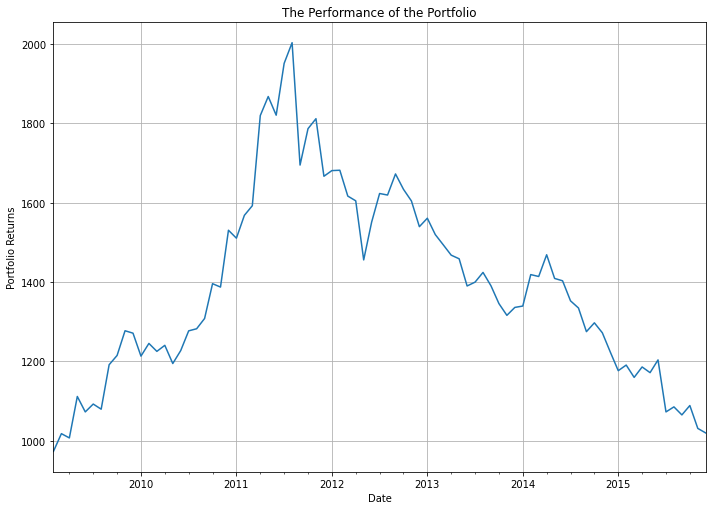

In [118]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
commodity_df_2009_2015_2['Commodity_Port_Value'].plot(grid=True)
#plt.xticks(rotation=90)
plt.show();

In [119]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(commodity_df_2009_2015_2.Commodity_Port_Value.max() - commodity_df_2009_2015_2.Commodity_Port_Value.min()) / commodity_df_2009_2015_2.Commodity_Port_Value.max()

0.5139543345162126

In [120]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (commodity_df_2009_2015_2['Commodity_Port_Value'][-1] / commodity_df_2009_2015_2['Commodity_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 4.76%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [121]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
commodity_df_2009_2015_2['Monthly_Return'] = commodity_df_2009_2015_2['Commodity_Port_Value'].pct_change(1)

In [122]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = commodity_df_2009_2015_2['Monthly_Return'].mean() / commodity_df_2009_2015_2['Monthly_Return'].std()
Sharpe_Ratio

0.035113441459214856

In [123]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(83)
Annualized_Sharpe_Ratio

0.31989867614934864

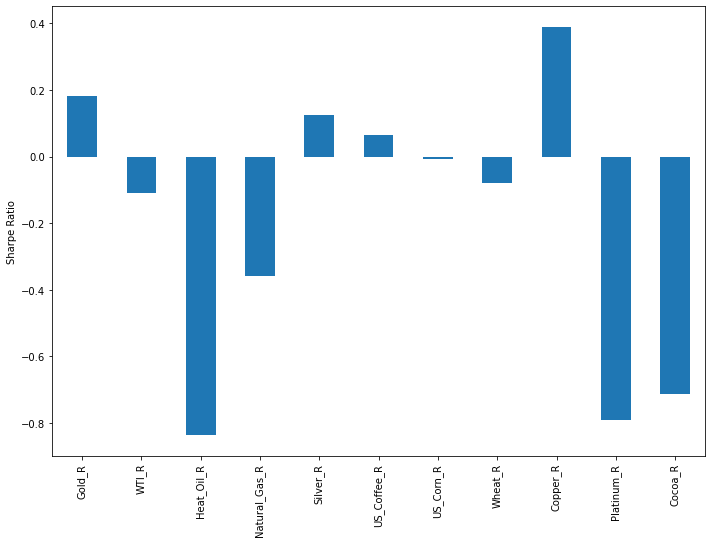

In [124]:
# Calcualte the Sharpe Ratio for commodity portfolio
def commodity_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = commodity_df_2009_2015_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_sharpes = commodity_df_2009_2015_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
commodity_sharpes.plot.bar(); 

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

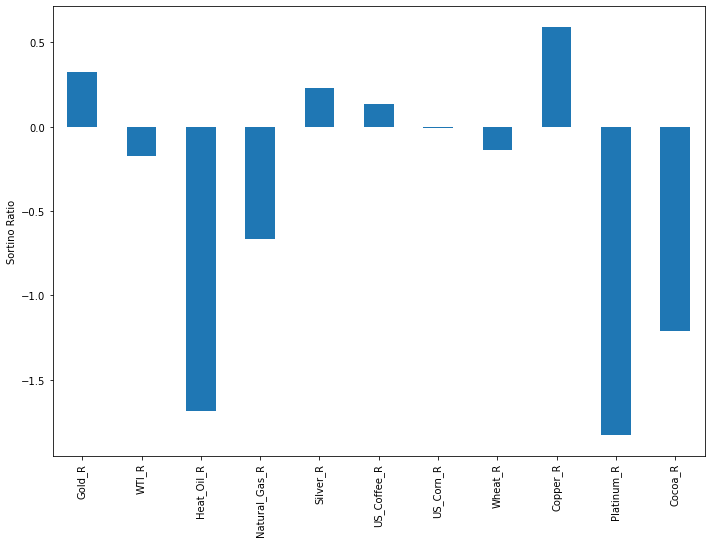

In [125]:
# Calcualte the Sortino Ratio for commodity portfolio
def commodity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = commodity_df_2009_2015_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
                                          'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_sortinos = commodity_df_2009_2015_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
commodity_sortinos.plot.bar(); 

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

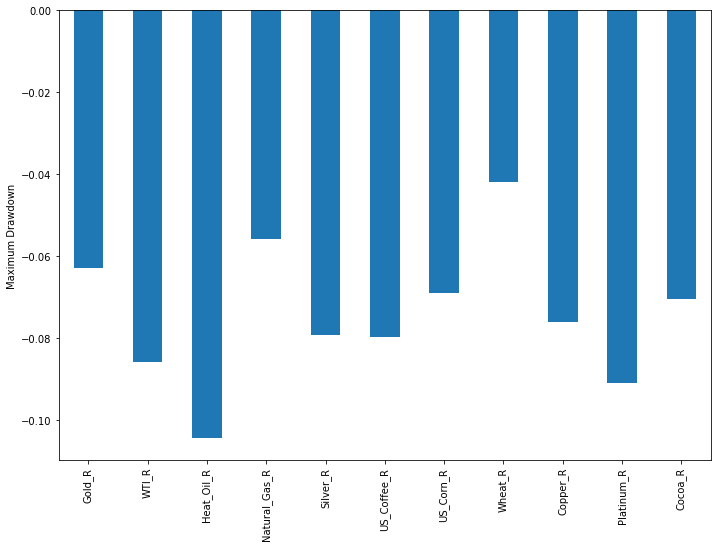

In [126]:
# Calcualte the Maximum Drawdown (MDD) for commodity portfolio
def commodity_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = commodity_df_2009_2015_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_max_drawdown = commodity_df_2009_2015_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
commodity_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2009 till December 2015.
- Target volatility 7.5 %.
- Maximum Drawdown 51.39 %.
- Cumulative return of the of portfolio 4.76 %
- Sharpe Ratio 3.51 %.


In [127]:
# Dataset (Currency.csv) from Master Equity Portfolio Excel file
# We have five different currency:Australian dollar (AUD), Euro, Canadian dollar (CAD), Japanese yen (JPY),
# and British pound sterling (GBP.)

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
currency_df_2009_2015 = pd.read_csv('Currency_2009_2015.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(currency_df_2009_2015.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
currency_df_2009_2015.head()

(84, 6)


,Date,AUD,EURO,CAD,JPY,GBP
0,1/1/2009,0.98,0.75,0.99,81.14,0.64
1,2/1/2009,1.04,0.77,1.03,83.54,0.64
2,3/1/2009,1.02,0.72,1.02,80.48,0.62
3,4/1/2009,1.04,0.74,1.03,83.56,0.64
4,5/1/2009,1.12,0.79,1.06,84.12,0.65


In [128]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
currency_df_2009_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    84 non-null     object 
 1   AUD     84 non-null     float64
 2   EURO    84 non-null     float64
 3   CAD     84 non-null     float64
 4   JPY     84 non-null     float64
 5   GBP     84 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.1+ KB


In [129]:
# Use pandas.to_datetime() function to convert argument to datetime
currency_df_2009_2015['Date'] = pd.to_datetime(currency_df_2009_2015.Date)

In [130]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
currency_df_2009_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    84 non-null     datetime64[ns]
 1   AUD     84 non-null     float64       
 2   EURO    84 non-null     float64       
 3   CAD     84 non-null     float64       
 4   JPY     84 non-null     float64       
 5   GBP     84 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 4.1 KB


In [131]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
currency_df_2009_2015.set_index('Date',inplace=True)

In [132]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
currency_df_2009_2015.isnull().any()

AUD     False
EURO    False
CAD     False
JPY     False
GBP     False
dtype: bool

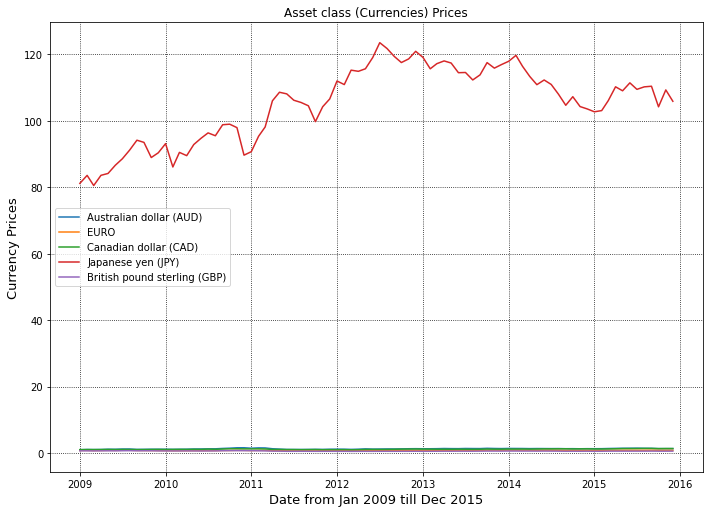

In [133]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2009_2015.index, currency_df_2009_2015.AUD, label='Australian dollar (AUD)')
plt.plot(currency_df_2009_2015.index, currency_df_2009_2015.EURO, label='EURO')
plt.plot(currency_df_2009_2015.index, currency_df_2009_2015.CAD, label='Canadian dollar (CAD)')
plt.plot(currency_df_2009_2015.index, currency_df_2009_2015.JPY, label='Japanese yen (JPY)')
plt.plot(currency_df_2009_2015.index, currency_df_2009_2015.GBP, label='British pound sterling (GBP)')

plt.title('Asset class (Currencies) Prices')
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=13)
plt.ylabel('Currency Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=6);

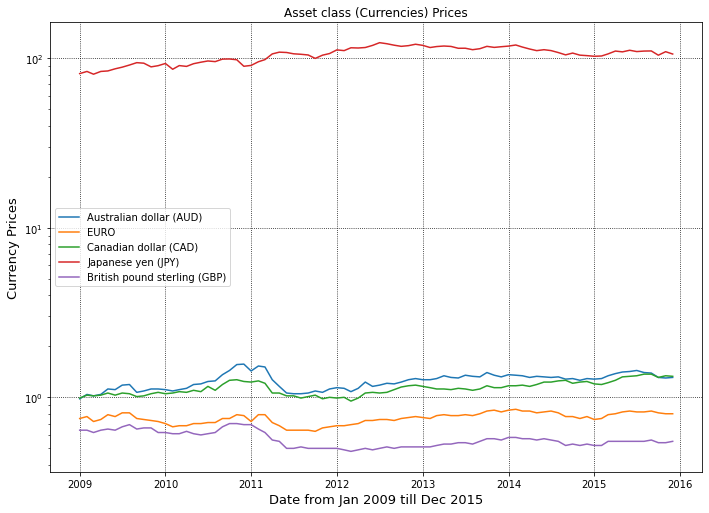

In [134]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2009_2015.index, currency_df_2009_2015.AUD, label='Australian dollar (AUD)')
plt.plot(currency_df_2009_2015.index, currency_df_2009_2015.EURO, label='EURO')
plt.plot(currency_df_2009_2015.index, currency_df_2009_2015.CAD, label='Canadian dollar (CAD)')
plt.plot(currency_df_2009_2015.index, currency_df_2009_2015.JPY, label='Japanese yen (JPY)')
plt.plot(currency_df_2009_2015.index, currency_df_2009_2015.GBP, label='British pound sterling (GBP)')

plt.title('Asset class (Currencies) Prices')
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=13)
plt.ylabel('Currency Prices', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=6);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [135]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
currency_df_2009_2015 = currency_df_2009_2015[['AUD','EURO','CAD','JPY','GBP']].pct_change()
currency_df_2009_2015.head(5)

,AUD,EURO,CAD,JPY,GBP
Date,,,,,
2009-01-01,NaN,NaN,NaN,NaN,NaN
2009-02-01,0.061224,0.026667,0.040404,0.029579,0.000000
2009-03-01,-0.019231,-0.064935,-0.009709,-0.036629,-0.031250
2009-04-01,0.019608,0.027778,0.009804,0.038270,0.032258
2009-05-01,0.076923,0.067568,0.029126,0.006702,0.015625


In [136]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
currency_df_2009_2015.dropna(axis=0, inplace=True)
currency_df_2009_2015.head(5)

,AUD,EURO,CAD,JPY,GBP
Date,,,,,
2009-02-01,0.061224,0.026667,0.040404,0.029579,0.000000
2009-03-01,-0.019231,-0.064935,-0.009709,-0.036629,-0.031250
2009-04-01,0.019608,0.027778,0.009804,0.038270,0.032258
2009-05-01,0.076923,0.067568,0.029126,0.006702,0.015625
2009-06-01,-0.008929,-0.025316,-0.028302,0.029363,-0.015385


In [137]:
print('There are {} rows in the DataFrame'.format(currency_df_2009_2015.shape[0]))

There are 83 rows in the DataFrame


In [138]:
# Use pandas.DataFrame.copy() function to make a copy of currency_df
currency_df_2009_2015_2 = currency_df_2009_2015.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [139]:
vol_curr_df_2009_2015 = currency_df_2009_2015

In [140]:
vol_curr_df_2009_2015.shape[0]

83

In [141]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_curr_df_2009_2015['AUD_Vol'] = vol_curr_df_2009_2015['AUD'].rolling(83).std() * math.sqrt(83)
vol_curr_df_2009_2015['EURO_Vol'] = vol_curr_df_2009_2015['EURO'].rolling(83).std() * math.sqrt(83)
vol_curr_df_2009_2015['CAD_Vol'] = vol_curr_df_2009_2015['CAD'].rolling(83).std() * math.sqrt(83)
vol_curr_df_2009_2015['JPY_Vol'] = vol_curr_df_2009_2015['JPY'].rolling(83).std() * math.sqrt(83)
vol_curr_df_2009_2015['GBP_Vol'] = vol_curr_df_2009_2015['GBP'].rolling(83).std() * math.sqrt(83)

In [142]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_curr_df_2009_2015.dropna(axis=0, inplace=True)

In [143]:
vol_curr_df_2009_2015[['AUD_Vol','EURO_Vol','CAD_Vol','JPY_Vol','GBP_Vol']]

,AUD_Vol,EURO_Vol,CAD_Vol,JPY_Vol,GBP_Vol
Date,,,,,
2015-12-01,0.381809,0.294348,0.284786,0.269022,0.265221


**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy that focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, the Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that the RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [144]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_curr = (0.381809+0.294348+0.284786+0.269022+0.265221) / 5
Avg_vol_curr

0.2990372

In [145]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
curr_target_vol = 0.2990372 / 5
curr_target_vol

0.05980744

In [146]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_curr_df_2009_2015 = currency_df_2009_2015

In [147]:
port_curr_df_2009_2015['AUD_Alloc'] = curr_target_vol / vol_curr_df_2009_2015['AUD_Vol'] 
port_curr_df_2009_2015['EURO_Alloc'] = curr_target_vol / vol_curr_df_2009_2015['EURO_Vol'] 
port_curr_df_2009_2015['CAD_Alloc'] = curr_target_vol / vol_curr_df_2009_2015['CAD_Vol'] 
port_curr_df_2009_2015['JPY_Alloc'] = curr_target_vol / vol_curr_df_2009_2015['JPY_Vol'] 
port_curr_df_2009_2015['GBP_Alloc'] = curr_target_vol / vol_curr_df_2009_2015['GBP_Vol'] 

In [148]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_curr_df_2009_2015.dropna(axis=0, inplace=True)

In [149]:
port_curr_df_2009_2015[['AUD_Alloc','EURO_Alloc','CAD_Alloc','JPY_Alloc','GBP_Alloc']]

,AUD_Alloc,EURO_Alloc,CAD_Alloc,JPY_Alloc,GBP_Alloc
Date,,,,,
2015-12-01,0.156642,0.203186,0.210008,0.222314,0.225501


In [150]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (currencies)

In [151]:
currency_df_2009_2015_2['AUD_R'] = currency_df_2009_2015_2['AUD'] * 0.156642
currency_df_2009_2015_2['EURO_R'] = currency_df_2009_2015_2['EURO'] * 0.203186
currency_df_2009_2015_2['CAD_R'] = currency_df_2009_2015_2['CAD'] * 0.210008
currency_df_2009_2015_2['JPY_R'] = currency_df_2009_2015_2['JPY'] * 0.222314
currency_df_2009_2015_2['GBP_R'] = currency_df_2009_2015_2['GBP'] * 0.225501

In [152]:
currency_df_2009_2015_2.head(5)

,AUD,EURO,CAD,JPY,GBP,AUD_R,EURO_R,CAD_R,JPY_R,GBP_R
Date,,,,,,,,,,
2009-02-01,0.061224,0.026667,0.040404,0.029579,0.000000,0.009590,0.005418,0.008485,0.006576,0.000000
2009-03-01,-0.019231,-0.064935,-0.009709,-0.036629,-0.031250,-0.003012,-0.013194,-0.002039,-0.008143,-0.007047
2009-04-01,0.019608,0.027778,0.009804,0.038270,0.032258,0.003071,0.005644,0.002059,0.008508,0.007274
2009-05-01,0.076923,0.067568,0.029126,0.006702,0.015625,0.012049,0.013729,0.006117,0.001490,0.003523
2009-06-01,-0.008929,-0.025316,-0.028302,0.029363,-0.015385,-0.001399,-0.005144,-0.005944,0.006528,-0.003469


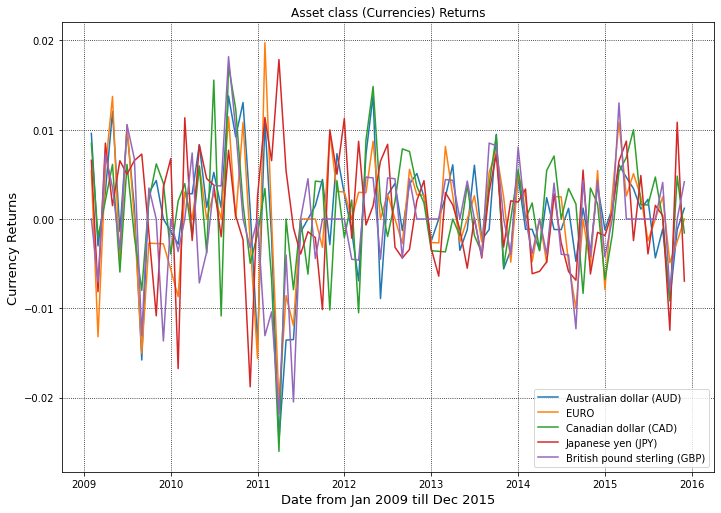

In [153]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2009_2015_2.index, currency_df_2009_2015_2.AUD_R, label='Australian dollar (AUD)')
plt.plot(currency_df_2009_2015_2.index, currency_df_2009_2015_2.EURO_R, label='EURO')
plt.plot(currency_df_2009_2015_2.index, currency_df_2009_2015_2.CAD_R, label='Canadian dollar (CAD)')
plt.plot(currency_df_2009_2015_2.index, currency_df_2009_2015_2.JPY_R, label='Japanese yen (JPY)')
plt.plot(currency_df_2009_2015_2.index, currency_df_2009_2015_2.GBP_R, label='British pound sterling (GBP)')

plt.title('Asset class (Currencies) Returns')
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=13)
plt.ylabel('Currency Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

In [154]:
# Adding up all the returns of all asset classes for all currencies (AUD, EURO, CAD, JPY, and GBP)

In [155]:
currency_df_2009_2015_2['Portfolio_R'] = currency_df_2009_2015_2['AUD_R'] + currency_df_2009_2015_2['EURO_R'] + currency_df_2009_2015_2['CAD_R'] + currency_df_2009_2015_2['JPY_R'] + currency_df_2009_2015_2['GBP_R']

In [156]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [157]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
currency_df_2009_2015_2['Currency_Port_Value'] = ((currency_df_2009_2015_2['Portfolio_R'] + 1).cumprod())*1000

In [158]:
currency_df_2009_2015_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R','Portfolio_R', 'Currency_Port_Value']].head(5)

,AUD_R,EURO_R,CAD_R,JPY_R,GBP_R,Portfolio_R,Currency_Port_Value
Date,,,,,,,
2009-02-01,0.009590,0.005418,0.008485,0.006576,0.000000,0.030070,1030.069508
2009-03-01,-0.003012,-0.013194,-0.002039,-0.008143,-0.007047,-0.033435,995.628890
2009-04-01,0.003071,0.005644,0.002059,0.008508,0.007274,0.026557,1022.069444
2009-05-01,0.012049,0.013729,0.006117,0.001490,0.003523,0.036908,1059.792246
2009-06-01,-0.001399,-0.005144,-0.005944,0.006528,-0.003469,-0.009428,1049.800903


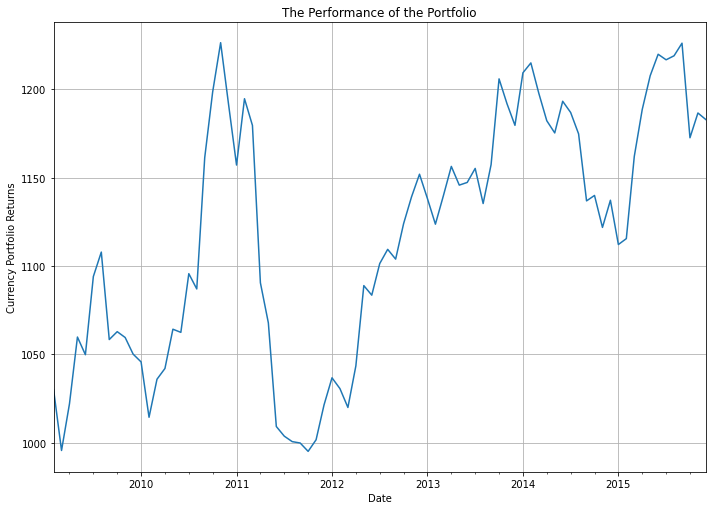

In [159]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2009 till Dec 2015')
plt.ylabel('Currency Portfolio Returns')
currency_df_2009_2015_2['Currency_Port_Value'].plot(grid=True)
# plt.xticks(rotation=90);
plt.show();

In [160]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
# (currency_df_2.Portfolio_Value.max() - currency_df_2.Portfolio_Value.min()) / currency_df_2.Portfolio_Value.max()
print("The Maximum Drawdown (MDD) of the Portfolio is {:.2f} %".format((currency_df_2009_2015_2.Currency_Port_Value.max() - currency_df_2009_2015_2.Currency_Port_Value.min()) / currency_df_2009_2015_2.Currency_Port_Value.max()
))

The Maximum Drawdown (MDD) of the Portfolio is 0.19 %


In [161]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (currency_df_2009_2015_2['Currency_Port_Value'][-1] / currency_df_2009_2015_2['Currency_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f} %".format(cumulative_return))

The Cumulative Return of the Portfolio is 14.83 %


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [162]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
currency_df_2009_2015_2['Monthly_Return'] = currency_df_2009_2015_2['Currency_Port_Value'].pct_change(1)

In [163]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = currency_df_2009_2015_2['Monthly_Return'].mean() / currency_df_2009_2015_2['Monthly_Return'].std()
Sharpe_Ratio

0.08391119983230542

In [164]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(83)
Annualized_Sharpe_Ratio

0.7644674126185228

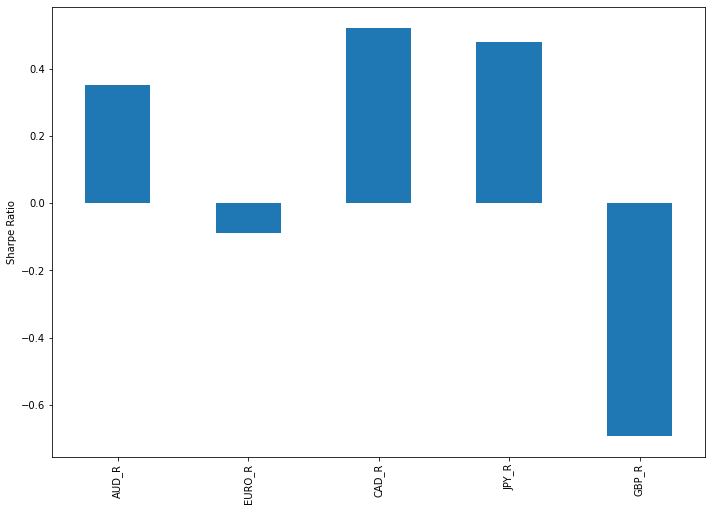

In [165]:
# Calcualte the Sharpe Ratio for currency portfolio
def currency_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = currency_df_2009_2015_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_sharpes = currency_df_2009_2015_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
currency_sharpes.plot.bar(); 

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

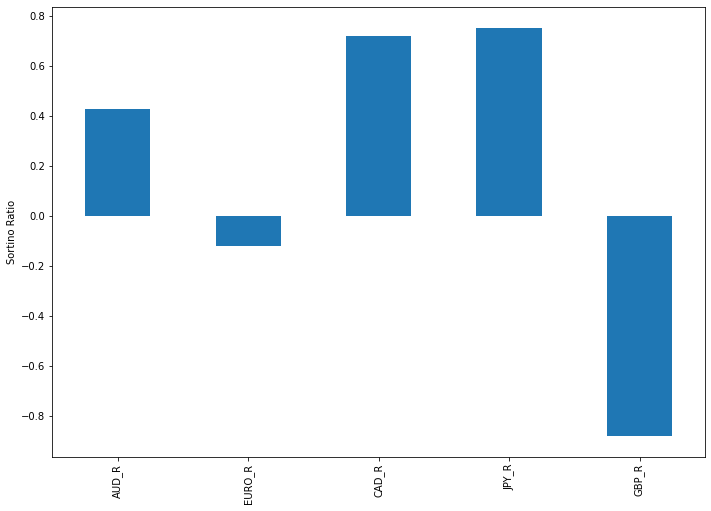

In [166]:
# Calcualte the Sortino Ratio for currency portfolio
def currency_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = currency_df_2009_2015_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_sortinos = currency_df_2009_2015_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
currency_sortinos.plot.bar(); 

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

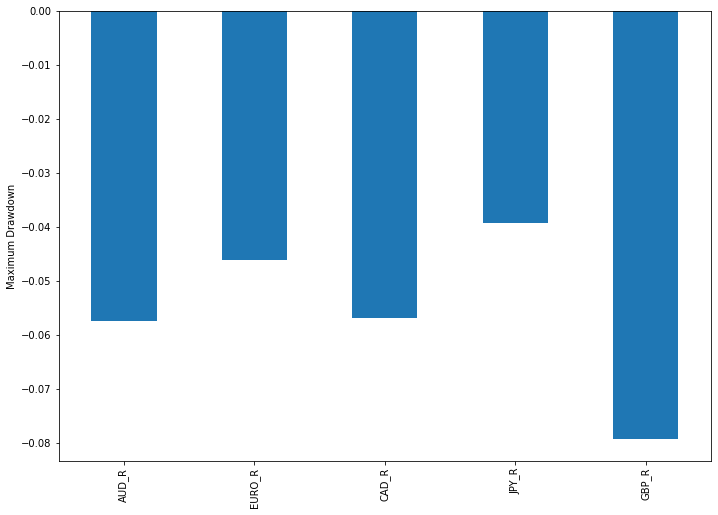

In [167]:
# Calcualte the Maximum Drawdown (MDD) for currency portfolio
def currency_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = currency_df_2009_2015_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_max_drawdown = currency_df_2009_2015_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
currency_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2009 till December 2015.
- Target volatility 5.98 %.
- Maximum Drawdown 0.19 %.
- Cumulative return of the of portfolio 14.83 %
- Sharpe Ratio 8.39 %.

In [168]:
# Dataset Industry Portfolio contains the monthly weighted average returns of industry portfolio
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
industry_portfolio_df_2009_2015 = pd.read_csv('Industry_Portfolio_2009_2015.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(industry_portfolio_df_2009_2015.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
industry_portfolio_df_2009_2015.head()

(84, 11)


,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,1/1/2009,-3.63,-12.48,-9.23,-3.11,-3.14,-10.36,-7.62,-2.20,-0.81,-18.34
1,2/1/2009,-7.59,-12.82,-13.50,-11.95,-4.97,-7.14,-3.11,-9.92,-12.65,-14.01
2,3/1/2009,6.38,12.83,7.58,3.76,11.32,7.64,9.94,7.05,2.79,12.90
3,4/1/2009,4.78,42.63,17.51,5.20,12.37,10.43,9.56,-0.95,2.13,16.37
4,5/1/2009,6.76,-2.82,5.39,10.77,3.16,1.52,-0.90,6.26,4.66,7.75


In [169]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
industry_portfolio_df_2009_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    84 non-null     object 
 1   NoDur   84 non-null     float64
 2   Durbl   84 non-null     float64
 3   Manuf   84 non-null     float64
 4   Enrgy   84 non-null     float64
 5   HiTec   84 non-null     float64
 6   Telcm   84 non-null     float64
 7   Shops   84 non-null     float64
 8   Hlth    84 non-null     float64
 9   Utils   84 non-null     float64
 10  Other   84 non-null     float64
dtypes: float64(10), object(1)
memory usage: 7.3+ KB


In [170]:
# Use pandas.to_datetime() function to convert argument to datetime
industry_portfolio_df_2009_2015['Date'] = pd.to_datetime(industry_portfolio_df_2009_2015.Date)

In [171]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
industry_portfolio_df_2009_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    84 non-null     datetime64[ns]
 1   NoDur   84 non-null     float64       
 2   Durbl   84 non-null     float64       
 3   Manuf   84 non-null     float64       
 4   Enrgy   84 non-null     float64       
 5   HiTec   84 non-null     float64       
 6   Telcm   84 non-null     float64       
 7   Shops   84 non-null     float64       
 8   Hlth    84 non-null     float64       
 9   Utils   84 non-null     float64       
 10  Other   84 non-null     float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 7.3 KB


In [172]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
industry_portfolio_df_2009_2015.set_index('Date',inplace=True)

In [173]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
industry_portfolio_df_2009_2015.isnull().any()

NoDur    False
Durbl    False
Manuf    False
Enrgy    False
HiTec    False
Telcm    False
Shops    False
Hlth     False
Utils    False
Other    False
dtype: bool

In [174]:
industry_portfolio_df_2009_2015[['NoDur','Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth ','Utils','Other']].head(5)

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
2009-01-01,-3.63,-12.48,-9.23,-3.11,-3.14,-10.36,-7.62,-2.20,-0.81,-18.34
2009-02-01,-7.59,-12.82,-13.50,-11.95,-4.97,-7.14,-3.11,-9.92,-12.65,-14.01
2009-03-01,6.38,12.83,7.58,3.76,11.32,7.64,9.94,7.05,2.79,12.90
2009-04-01,4.78,42.63,17.51,5.20,12.37,10.43,9.56,-0.95,2.13,16.37
2009-05-01,6.76,-2.82,5.39,10.77,3.16,1.52,-0.90,6.26,4.66,7.75


In [175]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
industry_portfolio_df_2009_2015 = industry_portfolio_df_2009_2015.rename(columns={'Hlth ':'Hlth'})

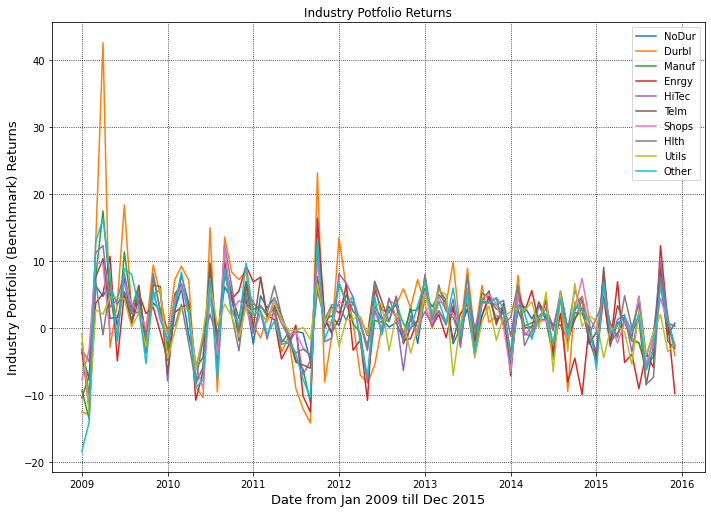

In [176]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(industry_portfolio_df_2009_2015.index, industry_portfolio_df_2009_2015.NoDur, label='NoDur')
plt.plot(industry_portfolio_df_2009_2015.index, industry_portfolio_df_2009_2015.Durbl, label='Durbl')
plt.plot(industry_portfolio_df_2009_2015.index, industry_portfolio_df_2009_2015.Manuf, label='Manuf')
plt.plot(industry_portfolio_df_2009_2015.index, industry_portfolio_df_2009_2015.Enrgy, label='Enrgy')
plt.plot(industry_portfolio_df_2009_2015.index, industry_portfolio_df_2009_2015.HiTec, label='HiTec')
plt.plot(industry_portfolio_df_2009_2015.index, industry_portfolio_df_2009_2015.Telcm, label='Telm')
plt.plot(industry_portfolio_df_2009_2015.index, industry_portfolio_df_2009_2015.Shops, label='Shops')
plt.plot(industry_portfolio_df_2009_2015.index, industry_portfolio_df_2009_2015.Hlth, label='Hlth')
plt.plot(industry_portfolio_df_2009_2015.index, industry_portfolio_df_2009_2015.Utils, label='Utils')
plt.plot(industry_portfolio_df_2009_2015.index, industry_portfolio_df_2009_2015.Other, label='Other')

plt.title('Industry Potfolio Returns')
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=13)
plt.ylabel('Industry Portfolio (Benchmark) Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [177]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
industry_portfolio_df_2009_2015_2 = industry_portfolio_df_2009_2015.copy()

In [178]:
# Adding up all the returns of all asset classes for all assets

In [179]:
industry_portfolio_df_2009_2015_2.columns

Index(['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth',
       'Utils', 'Other'],
      dtype='object')

In [180]:
industry_portfolio_df_2009_2015_2['Portfolio_R'] = industry_portfolio_df_2009_2015_2['NoDur'] + industry_portfolio_df_2009_2015_2['Durbl'] + industry_portfolio_df_2009_2015_2['Manuf'] + industry_portfolio_df_2009_2015_2['Enrgy'] + industry_portfolio_df_2009_2015_2['HiTec'] + industry_portfolio_df_2009_2015_2['Telcm']  + industry_portfolio_df_2009_2015_2['Shops'] + industry_portfolio_df_2009_2015_2['Hlth']+ industry_portfolio_df_2009_2015_2['Utils']+ industry_portfolio_df_2009_2015_2['Other']

In [181]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [182]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
industry_portfolio_df_2009_2015_2['Industry_Port_Value'] = ((industry_portfolio_df_2009_2015_2['Portfolio_R'] + 1).cumprod())*1000

In [183]:
industry_portfolio_df_2009_2015_2[['NoDur','Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth',
                                   'Utils','Other','Portfolio_R', 'Industry_Port_Value']].head(5)

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Portfolio_R,Industry_Port_Value
Date,,,,,,,,,,,,
2009-01-01,-3.63,-12.48,-9.23,-3.11,-3.14,-10.36,-7.62,-2.20,-0.81,-18.34,-70.92,-6.992000e+04
2009-02-01,-7.59,-12.82,-13.50,-11.95,-4.97,-7.14,-3.11,-9.92,-12.65,-14.01,-97.66,6.758467e+06
2009-03-01,6.38,12.83,7.58,3.76,11.32,7.64,9.94,7.05,2.79,12.90,82.19,5.622369e+08
2009-04-01,4.78,42.63,17.51,5.20,12.37,10.43,9.56,-0.95,2.13,16.37,120.03,6.804753e+10
2009-05-01,6.76,-2.82,5.39,10.77,3.16,1.52,-0.90,6.26,4.66,7.75,42.55,2.963470e+12


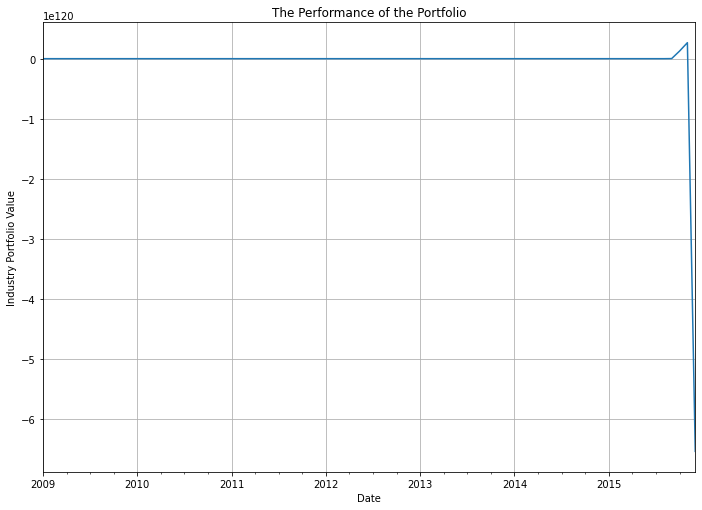

In [184]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2009 till Dec 2015');
plt.ylabel('Industry Portfolio Value');
industry_portfolio_df_2009_2015_2['Industry_Port_Value'].plot(grid=True)
# plt.xticks(rotation=90);
plt.show();

<h4><center>Investment on a Mixture of Different Asset Classes Portfolio</center></h4>

In [185]:
# Use pandas.concat() function to concatenate pandas objects along a particular axis with optional set logic along
# the other axes.
# I Concatenate Portfolio value of different asset classes (Bonds, Equities, Emerge Market Equities, Commodities, 
# Foreign Currencies)
# I create a hypothetical $1,000 portfolio for each

mix_port_2009_2015 = pd.concat([bond_df_2009_2015_2['Bond_Port_Value'],
                               equity_df_2009_2015_2['Equity_Port_Value'],
                               commodity_df_2009_2015_2['Commodity_Port_Value'],
                               currency_df_2009_2015_2['Currency_Port_Value']],axis=1).reindex(bond_df_2009_2015_2.index)
mix_port_2009_2015

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value
Date,,,,
2009-02-01,974.576957,934.921190,973.442997,1030.069508
2009-03-01,991.675540,990.381659,1018.061737,995.628890
2009-04-01,957.441853,1104.465548,1007.296209,1022.069444
2009-05-01,938.659525,1192.050293,1111.714560,1059.792246
2009-06-01,945.613126,1191.860117,1072.834484,1049.800903
...,...,...,...,...
2015-08-01,982.083097,1954.079380,1085.492587,1218.881137
2015-09-01,992.183818,1877.978827,1065.262628,1226.002322
2015-10-01,989.991439,2010.381562,1088.912778,1172.510946


In [186]:
mix_port_2009_2015.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83 entries, 2009-02-01 to 2015-12-01
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bond_Port_Value       83 non-null     float64
 1   Equity_Port_Value     83 non-null     float64
 2   Commodity_Port_Value  83 non-null     float64
 3   Currency_Port_Value   83 non-null     float64
dtypes: float64(4)
memory usage: 3.2 KB


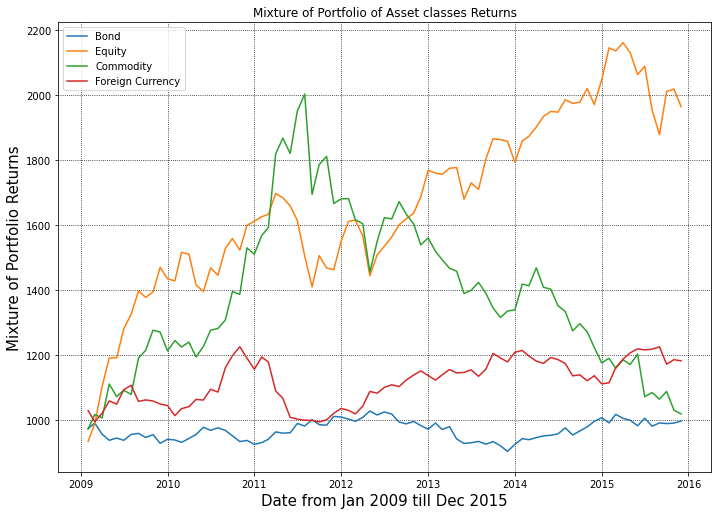

In [187]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2009_2015.index, mix_port_2009_2015.Bond_Port_Value, label='Bond')
plt.plot(mix_port_2009_2015.index, mix_port_2009_2015.Equity_Port_Value, label='Equity')
plt.plot(mix_port_2009_2015.index, mix_port_2009_2015.Commodity_Port_Value, label='Commodity')                               
plt.plot(mix_port_2009_2015.index, mix_port_2009_2015.Currency_Port_Value, label='Foreign Currency')
                               
plt.title('Mixture of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=15)
plt.ylabel('Mixture of Portfolio Returns', fontsize=15)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [274]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
mix_port_2009_2015.describe()

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value
count,83.000000,83.000000,83.000000,83.000000
mean,969.432481,1667.797529,1385.168317,1117.133280
std,29.278563,270.531638,239.304048,69.346711
min,904.701630,934.921190,973.442997,995.128925
25%,943.364727,1487.837902,1208.564243,1058.955740
50%,969.394076,1632.751220,1352.549655,1123.907186
75%,991.947822,1875.425459,1555.798919,1179.511364
max,1028.493500,2160.668880,2002.780945,1226.287172


**With Risk Parity Strategy on the Asset Classes and Portfolio (RP):**

In [188]:
1/4

0.25

In [189]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
Risk_Parity_Strategy_2009_2015 = mix_port_2009_2015.copy()

In [190]:
Risk_Parity_Strategy_2009_2015['Bond_Port_Value_25%'] = Risk_Parity_Strategy_2009_2015['Bond_Port_Value'] * .25
Risk_Parity_Strategy_2009_2015['Equity_Port_Value_25%'] = Risk_Parity_Strategy_2009_2015['Equity_Port_Value'] * .25
Risk_Parity_Strategy_2009_2015['Commodity_Port_Value_25%'] = Risk_Parity_Strategy_2009_2015['Commodity_Port_Value'] * .25
Risk_Parity_Strategy_2009_2015['Currency_Port_Value_25%'] = Risk_Parity_Strategy_2009_2015['Currency_Port_Value'] * .25

In [191]:
Risk_Parity_Strategy_2009_2015.head()

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value,Bond_Port_Value_25%,Equity_Port_Value_25%,Commodity_Port_Value_25%,Currency_Port_Value_25%
Date,,,,,,,,
2009-02-01,974.576957,934.921190,973.442997,1030.069508,243.644239,233.730297,243.360749,257.517377
2009-03-01,991.675540,990.381659,1018.061737,995.628890,247.918885,247.595415,254.515434,248.907223
2009-04-01,957.441853,1104.465548,1007.296209,1022.069444,239.360463,276.116387,251.824052,255.517361
2009-05-01,938.659525,1192.050293,1111.714560,1059.792246,234.664881,298.012573,277.928640,264.948061
2009-06-01,945.613126,1191.860117,1072.834484,1049.800903,236.403282,297.965029,268.208621,262.450226


In [192]:
Risk_Parity_Strategy_2009_2015.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83 entries, 2009-02-01 to 2015-12-01
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bond_Port_Value           83 non-null     float64
 1   Equity_Port_Value         83 non-null     float64
 2   Commodity_Port_Value      83 non-null     float64
 3   Currency_Port_Value       83 non-null     float64
 4   Bond_Port_Value_25%       83 non-null     float64
 5   Equity_Port_Value_25%     83 non-null     float64
 6   Commodity_Port_Value_25%  83 non-null     float64
 7   Currency_Port_Value_25%   83 non-null     float64
dtypes: float64(8)
memory usage: 5.8 KB


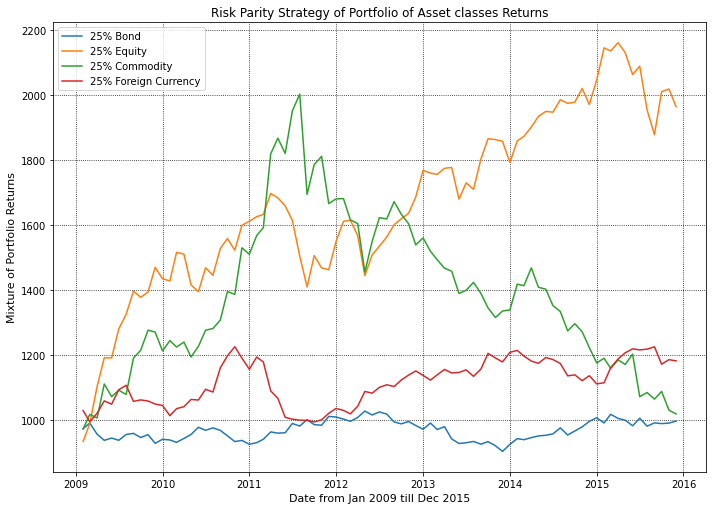

In [193]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(Risk_Parity_Strategy_2009_2015.index, Risk_Parity_Strategy_2009_2015.Bond_Port_Value, label='25% Bond')
plt.plot(Risk_Parity_Strategy_2009_2015.index, Risk_Parity_Strategy_2009_2015.Equity_Port_Value, label='25% Equity')
plt.plot(Risk_Parity_Strategy_2009_2015.index, Risk_Parity_Strategy_2009_2015.Commodity_Port_Value, label='25% Commodity')                               
plt.plot(Risk_Parity_Strategy_2009_2015.index, Risk_Parity_Strategy_2009_2015.Currency_Port_Value, label='25% Foreign Currency')
                               
plt.title('Risk Parity Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [275]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
Risk_Parity_Strategy_2009_2015[['Bond_Port_Value','Equity_Port_Value','Commodity_Port_Value','Currency_Port_Value']].describe()

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value
count,83.000000,83.000000,83.000000,83.000000
mean,969.432481,1667.797529,1385.168317,1117.133280
std,29.278563,270.531638,239.304048,69.346711
min,904.701630,934.921190,973.442997,995.128925
25%,943.364727,1487.837902,1208.564243,1058.955740
50%,969.394076,1632.751220,1352.549655,1123.907186
75%,991.947822,1875.425459,1555.798919,1179.511364
max,1028.493500,2160.668880,2002.780945,1226.287172


**With 60/40 Portfolio:**

- The 60/40 Portfolio composed of 60% Equities, and 40% Bonds

In [194]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
RP_60_40_Portfolio_2009_2015 = mix_port_2009_2015[['Bond_Port_Value','Equity_Port_Value']].copy()

In [195]:
RP_60_40_Portfolio_2009_2015['Bond_Port_Value_40%'] = RP_60_40_Portfolio_2009_2015['Bond_Port_Value'] * .40
RP_60_40_Portfolio_2009_2015['Equity_Port_Value_60%'] = RP_60_40_Portfolio_2009_2015['Equity_Port_Value'] * .60

In [196]:
RP_60_40_Portfolio_2009_2015

,Bond_Port_Value,Equity_Port_Value,Bond_Port_Value_40%,Equity_Port_Value_60%
Date,,,,
2009-02-01,974.576957,934.921190,389.830783,560.952714
2009-03-01,991.675540,990.381659,396.670216,594.228995
2009-04-01,957.441853,1104.465548,382.976741,662.679329
2009-05-01,938.659525,1192.050293,375.463810,715.230176
2009-06-01,945.613126,1191.860117,378.245251,715.116070
...,...,...,...,...
2015-08-01,982.083097,1954.079380,392.833239,1172.447628
2015-09-01,992.183818,1877.978827,396.873527,1126.787296
2015-10-01,989.991439,2010.381562,395.996576,1206.228937


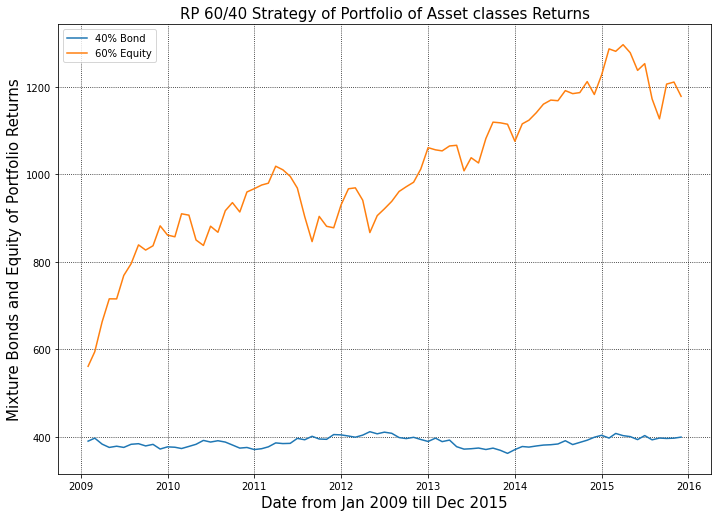

In [197]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(RP_60_40_Portfolio_2009_2015.index, RP_60_40_Portfolio_2009_2015['Bond_Port_Value_40%'], label='40% Bond')
plt.plot(RP_60_40_Portfolio_2009_2015.index, RP_60_40_Portfolio_2009_2015['Equity_Port_Value_60%'], label='60% Equity')
                               
plt.title('RP 60/40 Strategy of Portfolio of Asset classes Returns', fontsize=15)
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=15)
plt.ylabel('Mixture Bonds and Equity of Portfolio Returns', fontsize=15)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [276]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
RP_60_40_Portfolio_2009_2015[['Bond_Port_Value_40%','Equity_Port_Value_60%']].describe()

,Bond_Port_Value_40%,Equity_Port_Value_60%
count,83.000000,83.000000
mean,387.772992,1000.678517
std,11.711425,162.318983
min,361.880652,560.952714
25%,377.345891,892.702741
50%,387.757631,979.650732
75%,396.779129,1125.255275
max,411.397400,1296.401328


**With Ten months Moving Average on the Asset Classes and Portfolio:**

In [198]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
Moving_Average_Portfolio_2009_2015 = mix_port_2009_2015.copy()

In [199]:
# Calculating Moving Average with 10 numbers of observations on Mixture Portfolio 
# Use pandas.DataFrame.rolling(window=10) function to provide rolling window 10 of calculations
# Use Python mean() method to calculate the arithmetic mean (average) of data

Moving_Average_Portfolio_2009_2015['Bond_Port_Value_Avg'] = Moving_Average_Portfolio_2009_2015['Bond_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2009_2015['Equity_Port_Value_Avg'] = Moving_Average_Portfolio_2009_2015['Equity_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2009_2015['Commodity_Port_Value_Avg'] = Moving_Average_Portfolio_2009_2015['Commodity_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2009_2015['Currency_Port_Value_Avg'] = Moving_Average_Portfolio_2009_2015['Currency_Port_Value'].rolling(window=10).mean()


In [200]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
Moving_Average_Portfolio_2009_2015.dropna(axis=0, inplace=True)
Moving_Average_Portfolio_2009_2015.head()

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value,Bond_Port_Value_Avg,Equity_Port_Value_Avg,Commodity_Port_Value_Avg,Currency_Port_Value_Avg
Date,,,,,,,,
2009-11-01,956.144574,1394.299135,1277.236904,1059.533557,956.667448,1219.067246,1103.952578,1053.997508
2009-12-01,929.449598,1470.285057,1271.131000,1050.130920,952.154712,1272.603633,1133.721378,1056.003650
2010-01-01,941.879466,1435.079525,1213.341718,1045.719671,947.175105,1317.073420,1153.249376,1061.012728
2010-02-01,939.720737,1428.509449,1245.325474,1014.418893,945.402993,1349.477810,1177.052302,1060.247673
2010-03-01,932.350651,1516.164126,1225.292055,1035.933026,944.772106,1381.889193,1188.410052,1057.861751


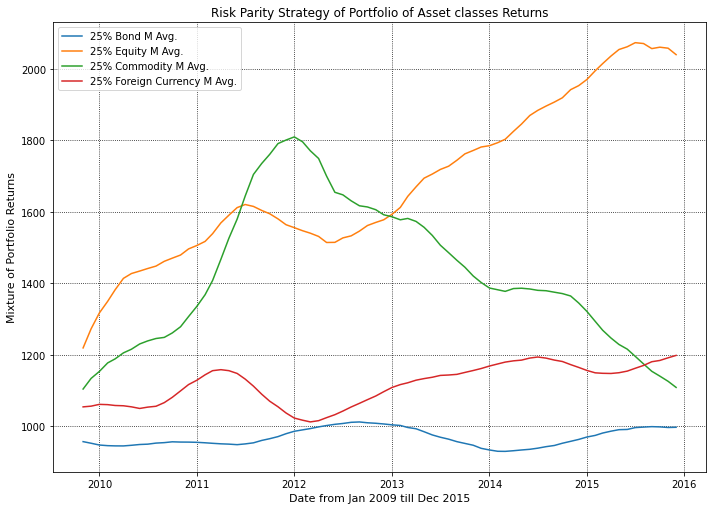

In [201]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(Moving_Average_Portfolio_2009_2015.index, Moving_Average_Portfolio_2009_2015.Bond_Port_Value_Avg, label='25% Bond M Avg.')
plt.plot(Moving_Average_Portfolio_2009_2015.index, Moving_Average_Portfolio_2009_2015.Equity_Port_Value_Avg, label='25% Equity M Avg.')
plt.plot(Moving_Average_Portfolio_2009_2015.index, Moving_Average_Portfolio_2009_2015.Commodity_Port_Value_Avg, label='25% Commodity M Avg.')                               
plt.plot(Moving_Average_Portfolio_2009_2015.index, Moving_Average_Portfolio_2009_2015.Currency_Port_Value_Avg, label='25% Foreign Currency M Avg.')
                               
plt.title('Risk Parity Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [277]:
# Use pandas.DataFrame.describe() method to generate descriptive statistics,such as count, arithmetic mean, standard deviation
# minimum value, maximum value, and percentile
Moving_Average_Portfolio_2009_2015[['Bond_Port_Value_Avg','Equity_Port_Value_Avg',
                                    'Commodity_Port_Value_Avg','Currency_Port_Value_Avg']].describe()

,Bond_Port_Value_Avg,Equity_Port_Value_Avg,Commodity_Port_Value_Avg,Currency_Port_Value_Avg
count,74.000000,74.000000,74.000000,74.000000
mean,968.489657,1680.974218,1424.580578,1116.782376
std,24.708229,223.448714,202.304876,55.280899
min,929.419827,1219.067246,1103.952578,1011.897877
25%,949.613415,1528.123181,1247.238253,1060.438936
50%,958.783717,1612.160467,1384.673719,1132.496737
75%,993.096506,1863.829532,1585.108559,1160.575444
max,1011.766792,2073.694179,1809.884123,1198.109696


**With Moving Average (MA) Crossover Strategy**

- The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time.

- The moving average crossover strategy is geared toward finding the middle of a trend.  A trend defines price action in which prices move in a specific direction over a period of time.  Generally trends are either upward or downward, as sideways movements are considered consolidation and not trends. 

In [202]:
moving_average_df = mix_port_2009_2015.copy()
moving_average_df.head(3)

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value
Date,,,,
2009-02-01,974.576957,934.921190,973.442997,1030.069508
2009-03-01,991.675540,990.381659,1018.061737,995.628890
2009-04-01,957.441853,1104.465548,1007.296209,1022.069444


In [203]:
# Create moving average of 10 months
moving_average_df['MA10_bond'] = moving_average_df['Bond_Port_Value'].rolling(10).mean()
moving_average_df['MA10_equity'] = moving_average_df['Equity_Port_Value'].rolling(10).mean()
moving_average_df['MA10_commodity'] = moving_average_df['Commodity_Port_Value'].rolling(10).mean()
moving_average_df['MA10_currency'] = moving_average_df['Currency_Port_Value'].rolling(10).mean()

# Create moving average of 20 months
moving_average_df['MA20_bond'] = moving_average_df['Bond_Port_Value'].rolling(20).mean()
moving_average_df['MA20_equity'] = moving_average_df['Equity_Port_Value'].rolling(20).mean()
moving_average_df['MA20_commodity'] = moving_average_df['Commodity_Port_Value'].rolling(20).mean()
moving_average_df['MA20_currency'] = moving_average_df['Currency_Port_Value'].rolling(20).mean()

In [204]:
moving_average_df.head(6)

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value,MA10_bond,MA10_equity,MA10_commodity,MA10_currency,MA20_bond,MA20_equity,MA20_commodity,MA20_currency
Date,,,,,,,,,,,,
2009-02-01,974.576957,934.921190,973.442997,1030.069508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-01,991.675540,990.381659,1018.061737,995.628890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-01,957.441853,1104.465548,1007.296209,1022.069444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-01,938.659525,1192.050293,1111.714560,1059.792246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-06-01,945.613126,1191.860117,1072.834484,1049.800903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-07-01,938.703877,1281.115165,1092.607273,1094.025900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
moving_average_df.dropna(axis=0, inplace=True)
moving_average_df.head(5)

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value,MA10_bond,MA10_equity,MA10_commodity,MA10_currency,MA20_bond,MA20_equity,MA20_commodity,MA20_currency
Date,,,,,,,,,,,,
2010-09-01,969.223715,1527.902987,1308.126604,1161.243958,953.870297,1461.535621,1248.502926,1065.874992,955.268872,1340.301434,1176.227752,1059.936250
2010-10-01,952.489426,1558.760820,1395.781206,1198.458701,956.174279,1470.383197,1260.967946,1080.707770,954.164496,1371.493415,1197.344662,1068.355710
2010-11-01,934.794523,1522.943799,1387.248143,1226.287172,955.465785,1479.169625,1278.358589,1098.764520,951.320445,1398.121522,1215.803982,1079.888624
2010-12-01,938.369062,1599.302908,1530.342916,1191.275874,955.330618,1496.248971,1306.860333,1116.450218,950.366805,1422.863390,1241.956318,1088.348945
2011-01-01,926.426315,1611.863783,1510.383689,1157.072182,954.738184,1505.818936,1335.369496,1128.564134,949.755145,1443.854065,1261.889774,1093.212942


In [206]:
# Define the Buy and Sell Signals (Trade Signals) of all asset classes of Portfolio

# Buy and Sell Signals of Bonds
Buy_Bond = []
Sell_Bond = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_bond.iloc[i] > moving_average_df.MA20_bond.iloc[i] \
    and moving_average_df.MA10_bond.iloc[i-1] < moving_average_df.MA20_bond.iloc[i-1]:
        Buy_Bond.append(i)
        
    elif moving_average_df.MA10_bond.iloc[i] < moving_average_df.MA20_bond.iloc[i] \
    and moving_average_df.MA10_bond.iloc[i-1] > moving_average_df.MA20_bond.iloc[i-1]:
        Sell_Bond.append(i)    

# Buy and Sell Signals of Equity
Buy_Equity = []
Sell_Equity = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_equity.iloc[i] > moving_average_df.MA20_equity.iloc[i] \
    and moving_average_df.MA10_equity.iloc[i-1] < moving_average_df.MA20_equity.iloc[i-1]:
        Buy_Equity.append(i)
        
    elif moving_average_df.MA10_equity.iloc[i] < moving_average_df.MA20_equity.iloc[i] \
    and moving_average_df.MA10_equity.iloc[i-1] > moving_average_df.MA20_equity.iloc[i-1]:
        Sell_Equity.append(i)    
        
# Buy and Sell Signals of Commodity
Buy_Commodity = []
Sell_Commodity = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_commodity.iloc[i] > moving_average_df.MA20_commodity.iloc[i] \
    and moving_average_df.MA10_commodity.iloc[i-1] < moving_average_df.MA20_commodity.iloc[i-1]:
        Buy_Commodity.append(i)
        
    elif moving_average_df.MA10_commodity.iloc[i] < moving_average_df.MA20_commodity.iloc[i] \
    and moving_average_df.MA10_commodity.iloc[i-1] > moving_average_df.MA20_commodity.iloc[i-1]:
        Sell_Commodity.append(i)    

# Buy and Sell Signals of Currency
Buy_Currency = []
Sell_Currency = []

for i in range(len(moving_average_df)):
    if moving_average_df.MA10_currency.iloc[i] > moving_average_df.MA20_currency.iloc[i] \
    and moving_average_df.MA10_currency.iloc[i-1] < moving_average_df.MA20_currency.iloc[i-1]:
        Buy_Currency.append(i)
        
    elif moving_average_df.MA10_currency.iloc[i] < moving_average_df.MA20_currency.iloc[i] \
    and moving_average_df.MA10_currency.iloc[i-1] > moving_average_df.MA20_currency.iloc[i-1]:
        Sell_Currency.append(i)    

In [207]:
Buy_Bond, Sell_Bond

([1, 12, 49], [0, 9, 30])

In [208]:
Buy_Equity, Sell_Equity

([26], [17])

In [209]:
Buy_Commodity, Sell_Commodity

([0], [21])

In [210]:
Buy_Currency, Sell_Currency

([24, 60], [12, 51])

In [211]:
moving_average_df.columns

Index(['Bond_Port_Value', 'Equity_Port_Value', 'Commodity_Port_Value',
       'Currency_Port_Value', 'MA10_bond', 'MA10_equity', 'MA10_commodity',
       'MA10_currency', 'MA20_bond', 'MA20_equity', 'MA20_commodity',
       'MA20_currency'],
      dtype='object')

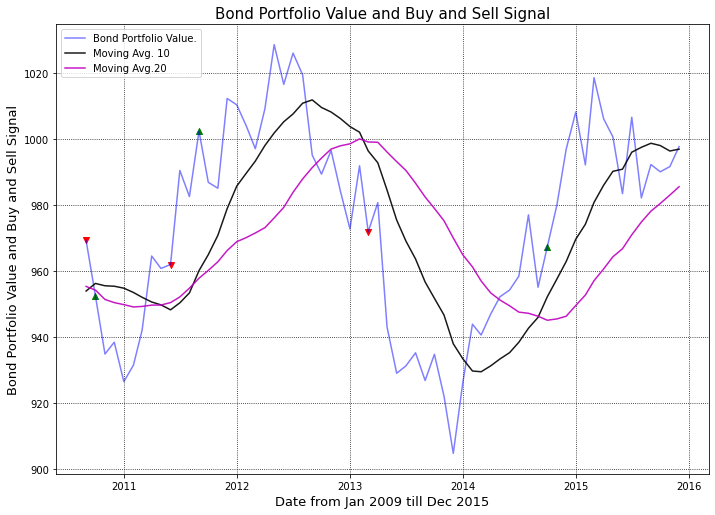

In [212]:
rcParams['figure.figsize'] = 11.69,8.27

# Bond Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Bond_Port_Value, label='Bond Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_bond, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_bond, label='Moving Avg.20',c='m' ,alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Bond].index,moving_average_df.iloc[Buy_Bond]['Bond_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Bond].index,moving_average_df.iloc[Sell_Bond]['Bond_Port_Value'], marker='v', color='r')
                               
plt.title('Bond Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=13)
plt.ylabel('Bond Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

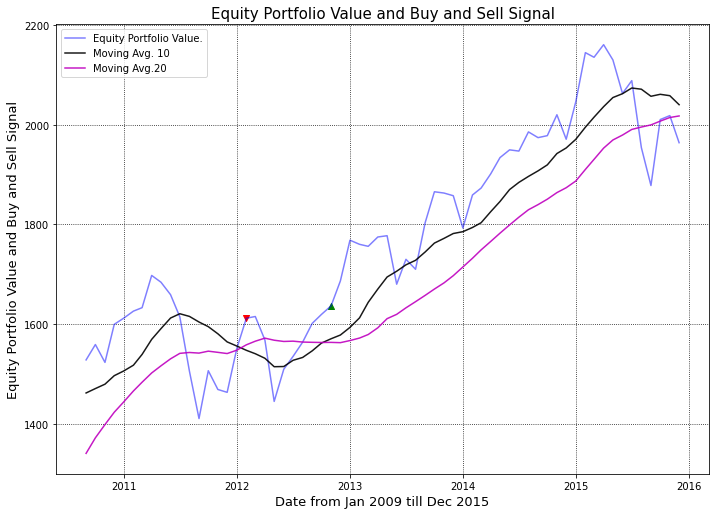

In [213]:
rcParams['figure.figsize'] = 11.69,8.27

# Equity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Equity_Port_Value, label='Equity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_equity, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_equity, label='Moving Avg.20', c='m', alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Equity].index,moving_average_df.iloc[Buy_Equity]['Equity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Equity].index,moving_average_df.iloc[Sell_Equity]['Equity_Port_Value'], marker='v', color='r')
                               
plt.title('Equity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=13)
plt.ylabel('Equity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

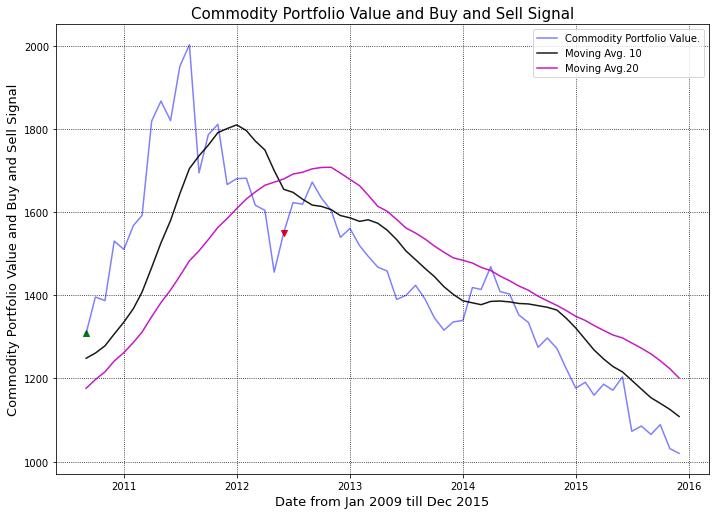

In [214]:
rcParams['figure.figsize'] = 11.69,8.27

# Commodity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Commodity_Port_Value, label='Commodity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_commodity, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_commodity, label='Moving Avg.20', c='m', alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Commodity].index,moving_average_df.iloc[Buy_Commodity]['Commodity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Commodity].index,moving_average_df.iloc[Sell_Commodity]['Commodity_Port_Value'], marker='v', color='r')
                               
plt.title('Commodity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=13)
plt.ylabel('Commodity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

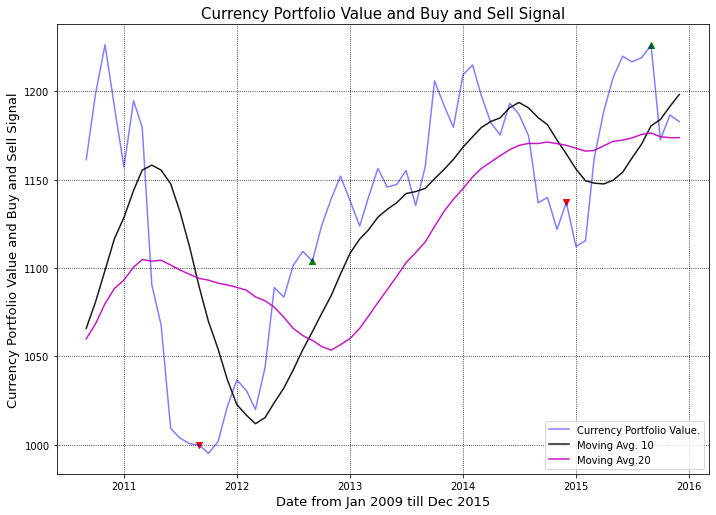

In [215]:
rcParams['figure.figsize'] = 11.69,8.27

# Currency Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df.index, moving_average_df.Currency_Port_Value, label='Currency Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df.index, moving_average_df.MA10_currency, label='Moving Avg. 10', c='k', alpha=0.9)
plt.plot(moving_average_df.index, moving_average_df.MA20_currency, label='Moving Avg.20', c='m', alpha=0.9)
# Trading Signals
plt.scatter(moving_average_df.iloc[Buy_Currency].index, moving_average_df.iloc[Buy_Currency]['Currency_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df.iloc[Sell_Currency].index, moving_average_df.iloc[Sell_Currency]['Currency_Port_Value'], marker='v', color='r')
                               
plt.title('Currency Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=13)
plt.ylabel('Currency Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

**With Moving Average (MA) Strategy (10 months)**

In [216]:
moving_average_df_10 = mix_port_2009_2015.copy()
moving_average_df_10.head(3)

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value
Date,,,,
2009-02-01,974.576957,934.921190,973.442997,1030.069508
2009-03-01,991.675540,990.381659,1018.061737,995.628890
2009-04-01,957.441853,1104.465548,1007.296209,1022.069444


In [217]:
# Create moving average of 10 months
moving_average_df_10['MA10_bond'] = moving_average_df['Bond_Port_Value'].rolling(10).mean()
moving_average_df_10['MA10_equity'] = moving_average_df['Equity_Port_Value'].rolling(10).mean()
moving_average_df_10['MA10_commodity'] = moving_average_df['Commodity_Port_Value'].rolling(10).mean()
moving_average_df_10['MA10_currency'] = moving_average_df['Currency_Port_Value'].rolling(10).mean()

In [218]:
moving_average_df_10.head(6)

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value,MA10_bond,MA10_equity,MA10_commodity,MA10_currency
Date,,,,,,,,
2009-02-01,974.576957,934.921190,973.442997,1030.069508,NaN,NaN,NaN,NaN
2009-03-01,991.675540,990.381659,1018.061737,995.628890,NaN,NaN,NaN,NaN
2009-04-01,957.441853,1104.465548,1007.296209,1022.069444,NaN,NaN,NaN,NaN
2009-05-01,938.659525,1192.050293,1111.714560,1059.792246,NaN,NaN,NaN,NaN
2009-06-01,945.613126,1191.860117,1072.834484,1049.800903,NaN,NaN,NaN,NaN
2009-07-01,938.703877,1281.115165,1092.607273,1094.025900,NaN,NaN,NaN,NaN


In [219]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
moving_average_df_10.dropna(axis=0, inplace=True)
moving_average_df_10.head(5)

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value,MA10_bond,MA10_equity,MA10_commodity,MA10_currency
Date,,,,,,,,
2011-06-01,961.906150,1658.844216,1820.160450,1009.192963,948.178823,1611.950884,1579.839875,1147.587743
2011-07-01,990.399891,1614.220847,1950.632256,1003.736385,950.296441,1620.582670,1644.090440,1131.836986
2011-08-01,982.498503,1505.390746,2002.780945,1000.634136,953.297348,1615.245663,1704.790414,1112.054529
2011-09-01,1002.309563,1410.155613,1694.510633,999.859906,960.048852,1603.966844,1735.516663,1089.411803
2011-10-01,986.790410,1506.219656,1786.175430,995.128925,964.890987,1594.658519,1761.099915,1069.797108


In [220]:
# Define the Buy and Sell Signals (Trade Signals) of all asset classes of Portfolio
# If the Moving Avg. (10 months) < asset value, the decision is buy the asset
# If the moving Avg. (10 months) < asset value, the decision is sell the asset

# Buy and Sell Signals of Bonds
Buy_Bond = []
Sell_Bond = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_bond.iloc[i] < moving_average_df_10.Bond_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_bond.iloc[i-1] > moving_average_df_10.Bond_Port_Value.iloc[i-1]:
        Buy_Bond.append(i)
        
    elif moving_average_df_10.MA10_bond.iloc[i] > moving_average_df_10.Bond_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_bond.iloc[i-1] < moving_average_df_10.Bond_Port_Value.iloc[i-1]:
        Sell_Bond.append(i)    

# Buy and Sell Signals of Equity
Buy_Equity = []
Sell_Equity = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_equity.iloc[i] < moving_average_df_10.Equity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_equity.iloc[i-1] > moving_average_df_10.Equity_Port_Value.iloc[i-1]:
        Buy_Equity.append(i)
        
    elif moving_average_df_10.MA10_equity.iloc[i] > moving_average_df_10.Equity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_equity.iloc[i-1] < moving_average_df_10.Equity_Port_Value.iloc[i-1]:
        Sell_Equity.append(i)    
        
# Buy and Sell Signals of Commodity
Buy_Commodity = []
Sell_Commodity = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_commodity.iloc[i] < moving_average_df_10.Commodity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_commodity.iloc[i-1] > moving_average_df_10.Commodity_Port_Value.iloc[i-1]:
        Buy_Commodity.append(i)
        
    elif moving_average_df_10.MA10_commodity.iloc[i] > moving_average_df_10.Commodity_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_commodity.iloc[i-1] < moving_average_df_10.Commodity_Port_Value.iloc[i-1]:
        Sell_Commodity.append(i)    

# Buy and Sell Signals of Currency
Buy_Currency = []
Sell_Currency = []

for i in range(len(moving_average_df_10)):
    if moving_average_df_10.MA10_currency.iloc[i] < moving_average_df_10.Currency_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_currency.iloc[i-1] > moving_average_df_10.Currency_Port_Value.iloc[i-1]:
        Buy_Currency.append(i)
        
    elif moving_average_df_10.MA10_currency.iloc[i] > moving_average_df_10.Currency_Port_Value.iloc[i] \
    and moving_average_df_10.MA10_currency.iloc[i-1] < moving_average_df_10.Currency_Port_Value.iloc[i-1]:
        Sell_Currency.append(i)    

In [221]:
Buy_Bond, Sell_Bond

([32, 49, 54], [15, 48, 50])

In [222]:
Buy_Equity, Sell_Equity

([0, 8, 13, 25, 27], [1, 11, 24, 26, 50])

In [223]:
Buy_Commodity, Sell_Commodity

([0, 4, 15, 32], [3, 6, 17, 37])

In [224]:
Buy_Currency, Sell_Currency

([7, 27, 36, 45], [26, 34, 37, 52])

In [225]:
moving_average_df_10.columns

Index(['Bond_Port_Value', 'Equity_Port_Value', 'Commodity_Port_Value',
       'Currency_Port_Value', 'MA10_bond', 'MA10_equity', 'MA10_commodity',
       'MA10_currency'],
      dtype='object')

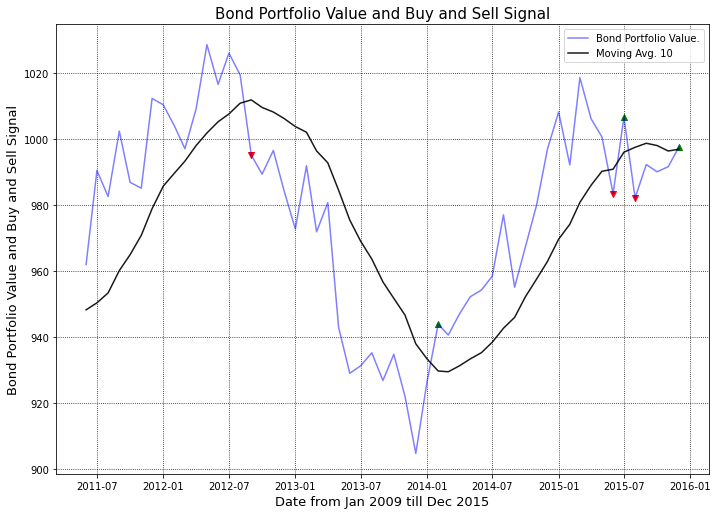

In [226]:
rcParams['figure.figsize'] = 11.69,8.27

# Bond Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Bond_Port_Value, label='Bond Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_bond, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Bond].index,moving_average_df_10.iloc[Buy_Bond]['Bond_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Bond].index,moving_average_df_10.iloc[Sell_Bond]['Bond_Port_Value'], marker='v', color='r')
                               
plt.title('Bond Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=13)
plt.ylabel('Bond Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

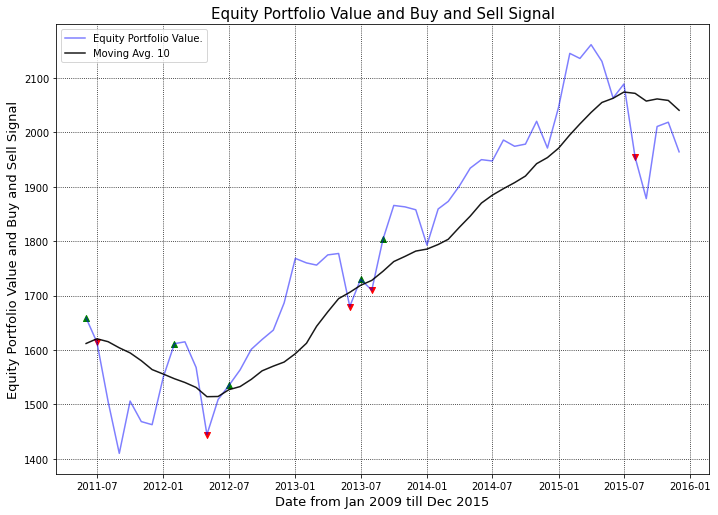

In [227]:
rcParams['figure.figsize'] = 11.69,8.27

# Equity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Equity_Port_Value, label='Equity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_equity, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Equity].index,moving_average_df_10.iloc[Buy_Equity]['Equity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Equity].index,moving_average_df_10.iloc[Sell_Equity]['Equity_Port_Value'], marker='v', color='r')
                               
plt.title('Equity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=13)
plt.ylabel('Equity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

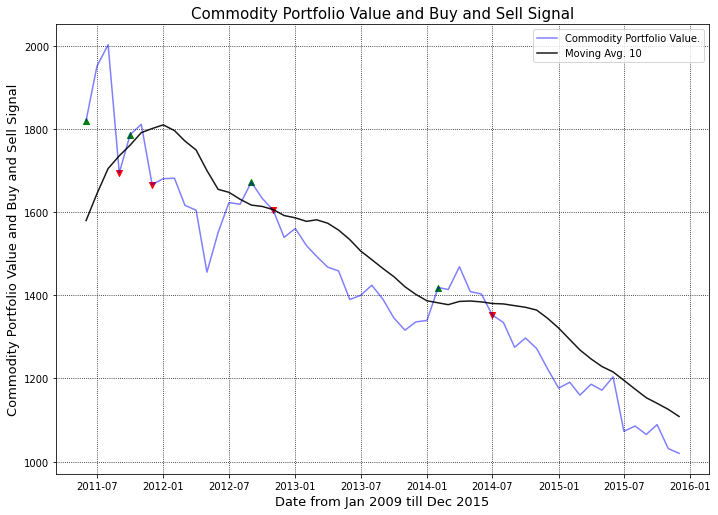

In [228]:
rcParams['figure.figsize'] = 11.69,8.27

# Commodity Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Commodity_Port_Value, label='Commodity Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_commodity, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Commodity].index,moving_average_df_10.iloc[Buy_Commodity]['Commodity_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Commodity].index,moving_average_df_10.iloc[Sell_Commodity]['Commodity_Port_Value'], marker='v', color='r')
                               
plt.title('Commodity Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=13)
plt.ylabel('Commodity Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

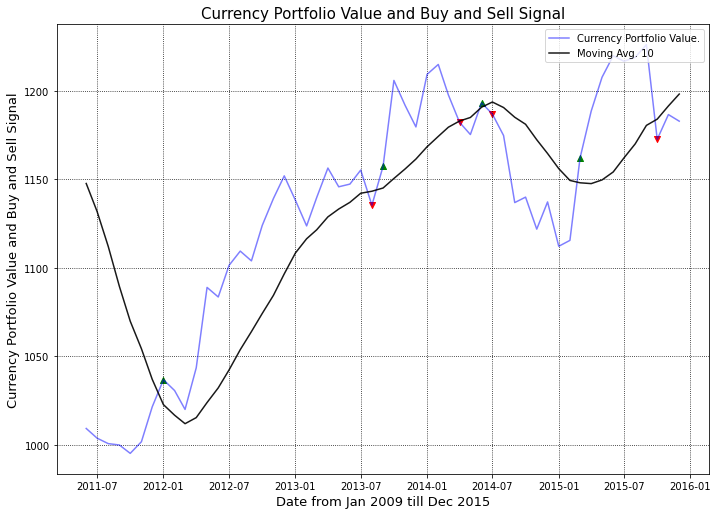

In [229]:
rcParams['figure.figsize'] = 11.69,8.27

# Currency Portfolio Value, Moving Average 10, and Moving Average 20
plt.plot(moving_average_df_10.index, moving_average_df_10.Currency_Port_Value, label='Currency Portfolio Value.', c='blue', alpha=0.5)
plt.plot(moving_average_df_10.index, moving_average_df_10.MA10_currency, label='Moving Avg. 10', c='k', alpha=0.9)

# Trading Signals
plt.scatter(moving_average_df_10.iloc[Buy_Currency].index, moving_average_df_10.iloc[Buy_Currency]['Currency_Port_Value'], marker='^', color='g')
plt.scatter(moving_average_df_10.iloc[Sell_Currency].index, moving_average_df_10.iloc[Sell_Currency]['Currency_Port_Value'], marker='v', color='r')
                               
plt.title('Currency Portfolio Value and Buy and Sell Signal', fontsize=15)
plt.xlabel('Date from Jan 2009 till Dec 2015', fontsize=13)
plt.ylabel('Currency Portfolio Value and Buy and Sell Signal', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

**With Trading Strategy Using Moving Average Convergence Divergence (MACD)**

- Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.

- The result of that calculation is the MACD line. A nine-day EMA of the MACD called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. Traders may buy the security when the MACD crosses above its signal line and sell—or short—the security when the MACD crosses below the signal line. 

In [230]:
MACD_df = mix_port_2009_2015.copy()
MACD_df.head(3)

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value
Date,,,,
2009-02-01,974.576957,934.921190,973.442997,1030.069508
2009-03-01,991.675540,990.381659,1018.061737,995.628890
2009-04-01,957.441853,1104.465548,1007.296209,1022.069444


In [231]:
# Calculate MACD and Signal Line for Bond Portfolio Value
# Calculate the short term exponential moving average (short_EMA)
# Use pandas.DataFrame.ewn() function to provide exponential weighted (EW) functions,
# such as mean(), var(), std(), corr(), cov().

MACD_df['short_EMA'] = MACD_df.Bond_Port_Value.ewm(span=12, adjust=False).mean()
MACD_df['long_EMA'] = MACD_df.Bond_Port_Value.ewm(span=26, adjust=False).mean()

In [232]:
# Calculate the MACD Line
MACD_df['MACD_Line'] = MACD_df['short_EMA'] - MACD_df['long_EMA']

In [233]:
# Calculate the Signal Line
MACD_df['Signal_Line'] = MACD_df.MACD_Line.ewm(span=9, adjust=False).mean()

In [234]:
MACD_df.head()

,Bond_Port_Value,Equity_Port_Value,Commodity_Port_Value,Currency_Port_Value,short_EMA,long_EMA,MACD_Line,Signal_Line
Date,,,,,,,,
2009-02-01,974.576957,934.921190,973.442997,1030.069508,974.576957,974.576957,0.000000,0.000000
2009-03-01,991.675540,990.381659,1018.061737,995.628890,977.207508,975.843518,1.363990,0.272798
2009-04-01,957.441853,1104.465548,1007.296209,1022.069444,974.166638,974.480432,-0.313794,0.155480
2009-05-01,938.659525,1192.050293,1111.714560,1059.792246,968.704005,971.827031,-3.123026,-0.500222
2009-06-01,945.613126,1191.860117,1072.834484,1049.800903,965.151562,969.885261,-4.733699,-1.346917


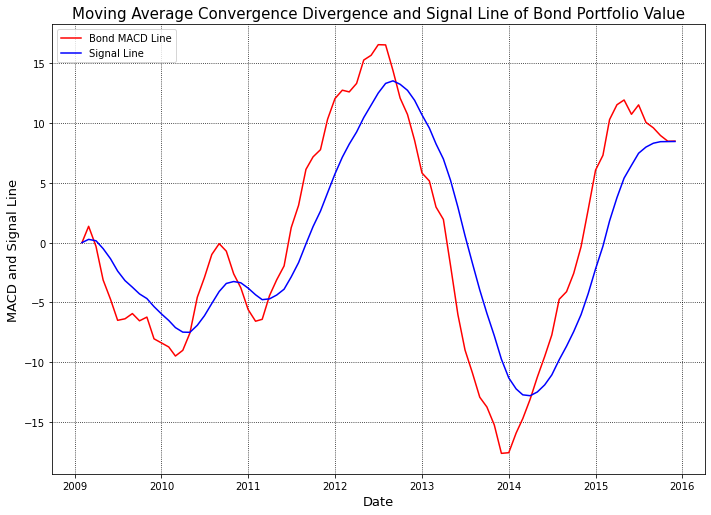

In [235]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(MACD_df.index, MACD_df.MACD_Line, label='Bond MACD Line', c='red')
plt.plot(MACD_df.index, MACD_df.Signal_Line, label='Signal Line', c='blue')
                               
plt.title('Moving Average Convergence Divergence and Signal Line of Bond Portfolio Value', fontsize=15)
plt.xlabel('Date', fontsize=13)
plt.ylabel('MACD and Signal Line', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

<h4><center>Other RP techniques of Portfolio</center></h4>

In [236]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df_2009_2015 = pd.read_csv('Bond_2009_2015.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df_2009_2015.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df_2009_2015.head()

(84, 7)


,Date,Germany,Australia,US,UK,Canada,Japan
0,1/1/2009,103.77,109.41,107.63,109.98,109.55,100.09
1,2/1/2009,105.34,106.81,97.69,107.53,105.37,100.31
2,3/1/2009,106.29,110.24,100.70,111.31,108.53,99.52
3,4/1/2009,104.78,97.84,96.91,108.27,105.64,98.88
4,5/1/2009,99.32,92.01,97.19,106.20,102.77,100.04


In [237]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df_2009_2015['Date'] = pd.to_datetime(bond_df_2009_2015.Date)

In [238]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df_2009_2015.set_index('Date',inplace=True)

In [239]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df_2009_2015 = np.log(1+bond_df_2009_2015[['Germany','Australia','US','UK','Canada','Japan']].pct_change())

In [240]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df_2009_2015.dropna(axis=0, inplace=True)
bond_df_2009_2015.head(5)

,Germany,Australia,US,UK,Canada,Japan
Date,,,,,,
2009-02-01,0.015016,-0.024051,-0.096900,-0.022529,-0.038903,0.002196
2009-03-01,0.008978,0.031608,0.030347,0.034549,0.029549,-0.007907
2009-04-01,-0.014308,-0.119326,-0.038363,-0.027691,-0.026990,-0.006452
2009-05-01,-0.053516,-0.061436,0.002885,-0.019304,-0.027544,0.011663
2009-06-01,0.016476,-0.011367,-0.006193,0.003666,0.004175,0.012714


In [241]:
1/6

0.16666666666666666

In [242]:
weights = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666,
           0.16666666666666666, 0.16666666666666666]

In [243]:
# Use numpy.dot() function to returns the dot product of two arrays.
np.dot(bond_df_2009_2015.mean(), weights)

-0.0003288675621165626

In [244]:
def portfolio_returns(weights):
    return np.dot(bond_df_2009_2015.mean(), weights)

In [245]:
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
bond_df_2009_2015.cov()

,Germany,Australia,US,UK,Canada,Japan
Germany,0.000539,0.000009,0.000211,0.000348,0.000097,0.000025
Australia,0.000009,0.001395,0.000194,0.000309,0.000264,0.000031
US,0.000211,0.000194,0.000670,0.000252,0.000226,0.000027
UK,0.000348,0.000309,0.000252,0.002166,0.000173,0.000030
Canada,0.000097,0.000264,0.000226,0.000173,0.000482,0.000040
Japan,0.000025,0.000031,0.000027,0.000030,0.000040,0.000111


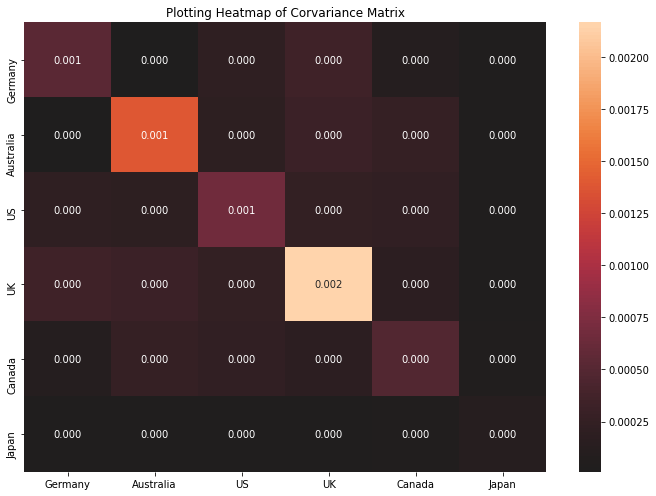

In [246]:
plt.figure(figsize=[ 11.69, 8.27]);
plt.title('Plotting Heatmap of Corvariance Matrix');
# Use seaborn.heatmap() function to plot rectangular data as a color-encoded matrix.
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
sb.heatmap(bond_df_2009_2015.cov(),annot=True,fmt='.3f', center=0);

In [247]:
# Calculate the portfolio_variance 
portfolio_variance = weights[0]**2* 0.000276 + weights[1]**2* 0.000196 + weights[2]**2* 0.000438 + weights[3]**2* 0.007404 + weights[4]**2* 0.000166 + weights[5]**2* 0.000211
portfolio_variance

0.00024141666666666663

In [248]:
# calculate the portfolio standard deviation (Standard deviation = Square root of the variance)
portfolio_standard_deviation = portfolio_variance**(1/2)
portfolio_standard_deviation

0.015537588830531803

In [249]:
bond_df_2009_2015.shape[0]

83

In [250]:
portfolio_variance**(1/2)*np.sqrt(83)

0.14155417102061435

In [251]:
# Calculate the portfolio_variance 
np.dot(np.dot(bond_df_2009_2015.cov(),weights),weights)

0.0002732607653768513

In [252]:
# calculate the portfolio standard deviation
(np.dot(np.dot(bond_df_2009_2015.cov(),weights),weights))**(1/2)

0.01653060087767082

In [253]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2009_2015.cov(),weights),weights))**(1/2)

In [254]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2009_2015.cov(),weights),weights))**(1/2)*np.sqrt(250)

**The Efficient Frontier**

- The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. 
- Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

In [255]:
def weights_creator(bond_df_2000_2008):
    rand = np.random.random(len(bond_df_2009_2015.columns))
    rand /= rand.sum()
    return rand


In [256]:
weights_creator(bond_df_2009_2015)

array([0.15016536, 0.01607911, 0.23332858, 0.14994261, 0.2367177 ,
       0.21376664])

In [257]:
def portfolio_returns(weights):
    return np.dot(bond_df_2009_2015.mean(), weights)

In [258]:
weights = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666,
           0.16666666666666666, 0.16666666666666666]

In [259]:
portfolio_returns(weights)

-0.0003288675621165626

In [260]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2009_2015.cov(),weights),weights))**(1/2)*np.sqrt(250)

In [261]:
portfolio_std(weights)

0.2613717493230912

In [262]:
# Generate efficient frontier

returns = []
stds = []
w = []

for i in range(500):
    weights = weights_creator(bond_df_2009_2015)
    returns.append(portfolio_returns(weights))
    stds.append(portfolio_std(weights))
    w.append(weights)
    

In [263]:
returns

[-0.0006010640672629278,
 -0.00043571341938654395,
 -0.00033727022871138065,
 -0.00037097164555746604,
 -0.0004995205155137649,
 -0.00027607301946003,
 -0.0003710370712594341,
 -0.00015879290140000766,
 -0.0004097610656238606,
 -0.0002995201764106034,
 -0.00020541854076015458,
 -0.0001728077796395697,
 -0.0005266767266239034,
 -0.00045860566880293486,
 -0.0003077502044500245,
 -0.00038505920172759815,
 -0.00045463465576351455,
 -0.00043508299985149315,
 -0.00047597036171706975,
 -0.00024338978088551304,
 -0.00040268974697343685,
 -0.0003515762752197753,
 -0.00031771910144846427,
 -0.0002536670427114632,
 -0.00026785477858393337,
 -0.0003833298265254156,
 -0.0002782675193346365,
 -0.0002228460004766944,
 -0.00024176674553985658,
 -0.0003303329755251718,
 -0.00021351196383422488,
 -0.0002509210706862775,
 -0.00020416931258095185,
 -0.00044110970446108535,
 -0.0003469005467003364,
 -0.00021694926804940464,
 -0.0003648842880525878,
 -0.00021222508600554085,
 -0.00032361164404150493,
 -0.00

In [264]:
stds

[0.33561226802721855,
 0.30275499636569136,
 0.25769619180021464,
 0.3125928086439786,
 0.31758056151623415,
 0.2531645387819354,
 0.24703355808070254,
 0.2277627745826414,
 0.28356920153296045,
 0.22302797443203906,
 0.23409752581983043,
 0.2672866331683412,
 0.2947150595201045,
 0.27096440666783617,
 0.22456002326437569,
 0.2592674365573149,
 0.2812109544770516,
 0.25719593562373166,
 0.32847570135256615,
 0.2769460110363617,
 0.2800575598734072,
 0.26774732056827827,
 0.29570802338191715,
 0.262214010731086,
 0.27489983496913295,
 0.30164230775576817,
 0.24219612757822226,
 0.21556260045516348,
 0.29219663069008944,
 0.3029834902006463,
 0.3128200402991105,
 0.22129967888498797,
 0.2497692562461751,
 0.276721874953767,
 0.3172781661886692,
 0.27316536644344247,
 0.28788862540569254,
 0.2501231730557534,
 0.2683320612175044,
 0.26490212624855963,
 0.2337810888243926,
 0.19689583082073403,
 0.23863697151873361,
 0.31349286840078977,
 0.3548762997009451,
 0.32742689954602694,
 0.267905

In [265]:
w

[array([0.01412405, 0.0897069 , 0.23486754, 0.32092606, 0.26692697,
        0.07344848]),
 array([0.01784348, 0.16810619, 0.17385462, 0.23497731, 0.30039232,
        0.10482607]),
 array([0.11264802, 0.18234905, 0.20377114, 0.15502417, 0.14413861,
        0.20206901]),
 array([0.04872839, 0.23431232, 0.12228051, 0.25532472, 0.20533943,
        0.13401463]),
 array([0.16387566, 0.13786358, 0.22072838, 0.27179235, 0.14672007,
        0.05901997]),
 array([0.27202942, 0.18232994, 0.31902918, 0.0078653 , 0.08735841,
        0.13138776]),
 array([0.14207476, 0.0411104 , 0.30633254, 0.01762806, 0.35412739,
        0.13872685]),
 array([0.24749857, 0.18990357, 0.14230819, 0.03373191, 0.17679073,
        0.20976703]),
 array([0.02758544, 0.1756065 , 0.19550755, 0.2166226 , 0.20348771,
        0.18119021]),
 array([0.10086001, 0.07895564, 0.13640249, 0.12348524, 0.27949411,
        0.28080251]),
 array([0.23083491, 0.18070958, 0.18481498, 0.03599011, 0.18884857,
        0.17880185]),
 array([0.

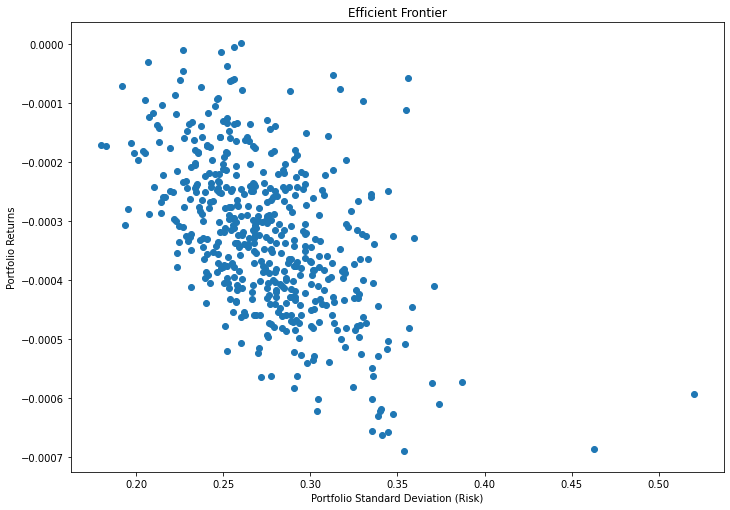

In [266]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

In [267]:
bond_df_2009_2015.shape[0]

83

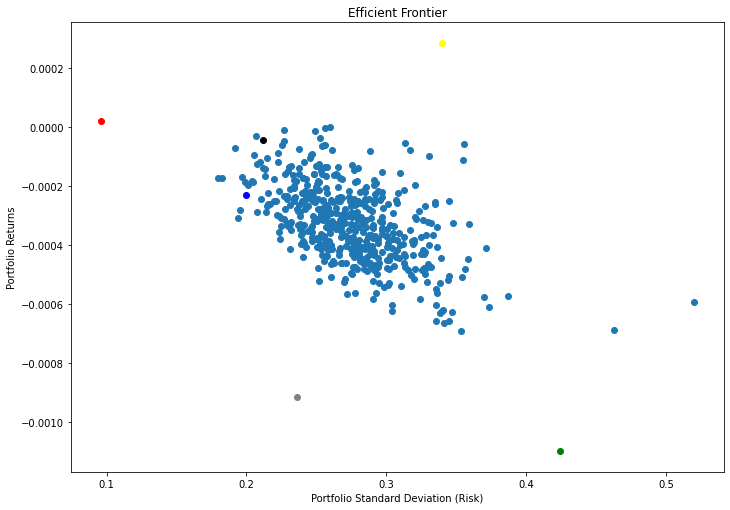

In [268]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)

plt.scatter(bond_df_2009_2015.std().iloc[0]*np.sqrt(83), bond_df_2009_2015.mean().iloc[0],c='k')
plt.scatter(bond_df_2009_2015.std().iloc[1]*np.sqrt(83), bond_df_2009_2015.mean().iloc[1],c='yellow')
plt.scatter(bond_df_2009_2015.std().iloc[2]*np.sqrt(83), bond_df_2009_2015.mean().iloc[2],c='gray')
plt.scatter(bond_df_2009_2015.std().iloc[3]*np.sqrt(83), bond_df_2009_2015.mean().iloc[3],c='green')
plt.scatter(bond_df_2009_2015.std().iloc[4]*np.sqrt(83), bond_df_2009_2015.mean().iloc[4],c='blue')
plt.scatter(bond_df_2009_2015.std().iloc[5]*np.sqrt(83), bond_df_2009_2015.mean().iloc[5],c='red')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

**Minimum Variance Portfolio (MV)**

- A minimum variance portfolio indicates a well-diversified portfolio that consists of individually risky assets, which are hedged when traded together, resulting in the lowest possible risk for the rate of expected return.

- A minimum variance portfolio is a collection of securities that combine to minimize the price volatility of the overall portfolio. Volatility is a statistical measure of a particular security's price movement (ups and downs).

In [269]:
min(stds)

0.1798688818986507

In [270]:
stds.index(min(stds))

173

In [271]:
# Minimum Variance Portfolio
returns[stds.index(min(stds))]

-0.00017073986361159887

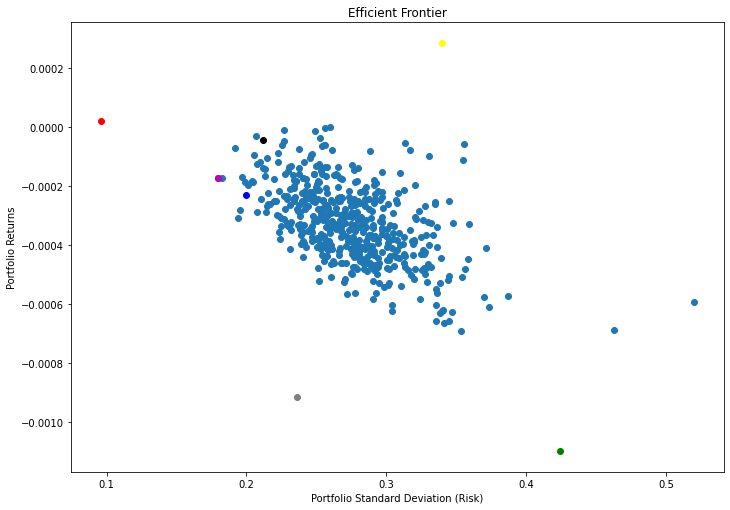

In [272]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)

plt.scatter(bond_df_2009_2015.std().iloc[0]*np.sqrt(83), bond_df_2009_2015.mean().iloc[0],c='k')
plt.scatter(bond_df_2009_2015.std().iloc[1]*np.sqrt(83), bond_df_2009_2015.mean().iloc[1],c='yellow')
plt.scatter(bond_df_2009_2015.std().iloc[2]*np.sqrt(83), bond_df_2009_2015.mean().iloc[2],c='gray')
plt.scatter(bond_df_2009_2015.std().iloc[3]*np.sqrt(83), bond_df_2009_2015.mean().iloc[3],c='green')
plt.scatter(bond_df_2009_2015.std().iloc[4]*np.sqrt(83), bond_df_2009_2015.mean().iloc[4],c='blue')
plt.scatter(bond_df_2009_2015.std().iloc[5]*np.sqrt(83), bond_df_2009_2015.mean().iloc[5],c='red')

plt.scatter(min(stds),returns[stds.index(min(stds))], c='m')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

In [273]:
# Calcualte the Sharpe Ratio
mean = np.mean(returns)
sigma = np.std(returns)

Sharpe_Ratio = mean / sigma
Sharpe_Ratio

-2.5100097702698743